# Visualization of results from training

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors = ['orange', 'peru', 'teal', 'dodgerblue', 'green', 'orangered', 'darkslategrey']

## Training progress results

In [3]:
full_baseline = "./full_set_results/cross_entropy/progress"
down_s_results = "./downsample_loss_results/cross_entropy/progress"
aug_d_results = "./results_aug/cross_entropy/progress"

## 1. Output stride hyperparameter on Baseline Architecture

In [4]:
oss = [8, 16, 32]
os_full_dfs_eval = []
os_full_dfs_train = []
for os_ in oss:
    df = pd.read_csv(os.path.join(full_baseline, f'os_{str(os_)}/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(full_baseline, f'os_{str(os_)}/train_results.csv'))
    os_full_dfs_eval.append(df)
    os_full_dfs_train.append(df_2)

### Output stride of 8

In [5]:
os_8_df = os_full_dfs_eval[0]
os_8_df[os_8_df['Mean IoUs'] == os_8_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
69       5        7000   0.449937      0.78913     0.452134     0.236111   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
69     0.001857     0.575292      0.63051     0.464526    0.566083   

    Overall Accs.  
69       0.820543

### Output stride of 16

In [6]:
os_16_df = os_full_dfs_eval[1]
os_16_df[os_16_df['Mean IoUs'] == os_16_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
69       5        7000    0.44716     0.787532     0.437049     0.214526   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
69     0.003413     0.577696     0.642632     0.467274    0.564392   

    Overall Accs.  
69       0.819949

### Output stride of 32

In [7]:
os_32_df = os_full_dfs_eval[2]
os_32_df[os_32_df['Mean IoUs'] == os_32_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
51       4        5200   0.451485     0.780046     0.452908     0.243966   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
51     0.019894     0.574638     0.616911     0.472033    0.579297   

    Overall Accs.  
51       0.815376

### Training Loss visualization

In [8]:
os_8_train_df = os_full_dfs_train[0]
os_16_train_df = os_full_dfs_train[1]
os_32_train_df = os_full_dfs_train[2]

Text(0, 0.5, 'Loss')

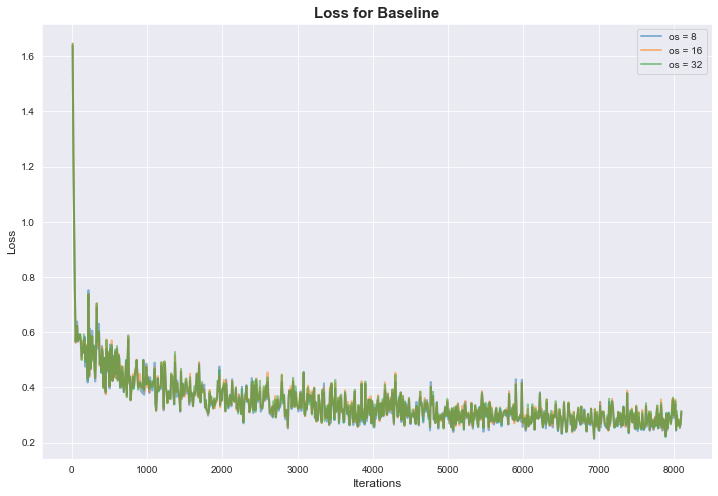

In [9]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(os_8_train_df.Iterations,   os_8_train_df.Loss, label="os = 8", alpha=0.5, linewidth=2)
plt.plot(os_16_train_df.Iterations, os_16_train_df.Loss, label="os = 16", alpha=0.5, linewidth=2)
plt.plot(os_32_train_df.Iterations, os_32_train_df.Loss, label="os = 32", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

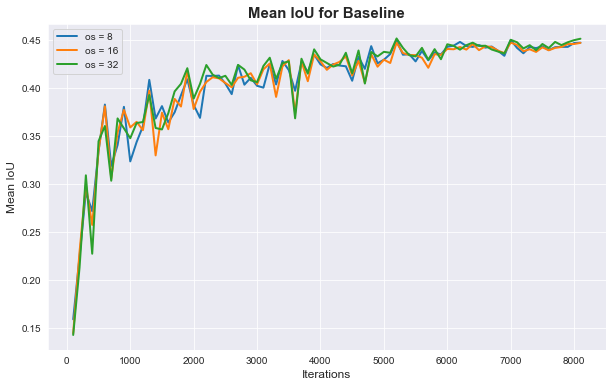

In [10]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(os_8_df.Iterations,  os_8_df['Mean IoUs'], label="os = 8", linewidth=2)
plt.plot(os_16_df.Iterations, os_16_df['Mean IoUs'], label="os = 16", linewidth=2)
plt.plot(os_32_df.Iterations, os_32_df['Mean IoUs'], label="os = 32", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

Text(0, 0.5, 'IoU')

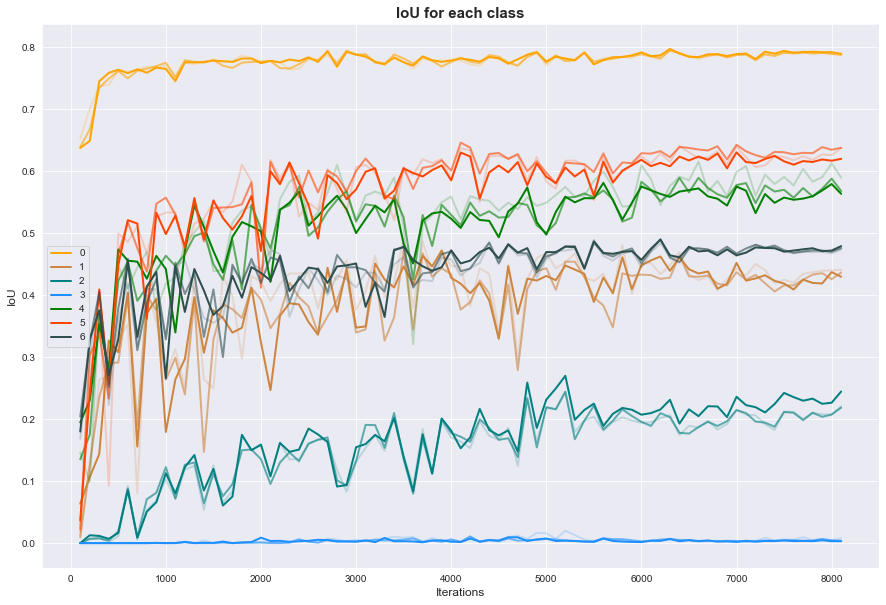

In [11]:
sns.set_style("darkgrid")
plt.subplots(figsize=(15,10))
plt.title("IoU for each class", fontweight = 'bold', fontsize=15)
for class_ in range(0,7):
    plt.plot(os_8_df.Iterations,  os_8_df[f'Class {class_} IoU'], label=class_, color = colors[class_], linewidth=2)
    plt.plot(os_16_df.Iterations,  os_16_df[f'Class {class_} IoU'], color = colors[class_], alpha = 0.6, linewidth=2)
    plt.plot(os_32_df.Iterations,  os_32_df[f'Class {class_} IoU'], color = colors[class_], alpha = 0.2, linewidth=2)

plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('IoU', fontsize=12)

## 2. Loss functions to improve class-imbalance problem on os 32 downsampled images

In [87]:
loss_fns = ['cross_entropy', 'focal_loss', 'acw_loss', 'lovasz_loss']
lossfn_dfs_eval = []
lossfn_dfs_train = []
for loss_fn in loss_fns:
    down_s_results = f"./downsample_loss_results/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(down_s_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(down_s_results, 'os_32/train_results.csv'))
    lossfn_dfs_eval.append(df)
    lossfn_dfs_train.append(df_2)

### Cross entropy loss

In [88]:
cross_e_df = lossfn_dfs_eval[0]
cross_e_df[cross_e_df['Mean IoUs'] == cross_e_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
79       5        8000   0.454499     0.793051     0.508904     0.197857   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
79     0.002599     0.594523     0.618103     0.466456    0.562145   

    Overall Accs.  
79       0.824335

### Focal loss

In [89]:
focal_loss_df = lossfn_dfs_eval[1]
focal_loss_df[focal_loss_df['Mean IoUs'] == focal_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
79       5        8000   0.453303     0.796266     0.515768      0.18477   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
79     0.001247     0.586482     0.617046     0.471539    0.555252   

    Overall Accs.  
79       0.827271

### ACW loss

In [90]:
acw_loss_df = lossfn_dfs_eval[2]
acw_loss_df[acw_loss_df['Mean IoUs'] == acw_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
80       6        8100   0.487234     0.785709     0.468695     0.391158   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
80     0.028148     0.589389     0.658941     0.488597    0.671632   

    Overall Accs.  
80       0.821105

### Lovasz loss

In [91]:
lovasz_loss_df = lossfn_dfs_eval[3]
lovasz_loss_df[lovasz_loss_df['Mean IoUs'] == lovasz_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
69       5        7000    0.35326      0.78024     0.441184     0.001257   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
69          0.0     0.457279     0.448918     0.343939    0.442858   

    Overall Accs.  
69       0.801029

### Training Loss visualization

In [92]:
cross_e_train_df = lossfn_dfs_train[0]
focal_loss_train_df = lossfn_dfs_train[1]
acw_loss_train_df = lossfn_dfs_train[2]
lovasz_loss_train_df = lossfn_dfs_train[3]

Text(0, 0.5, 'Loss')

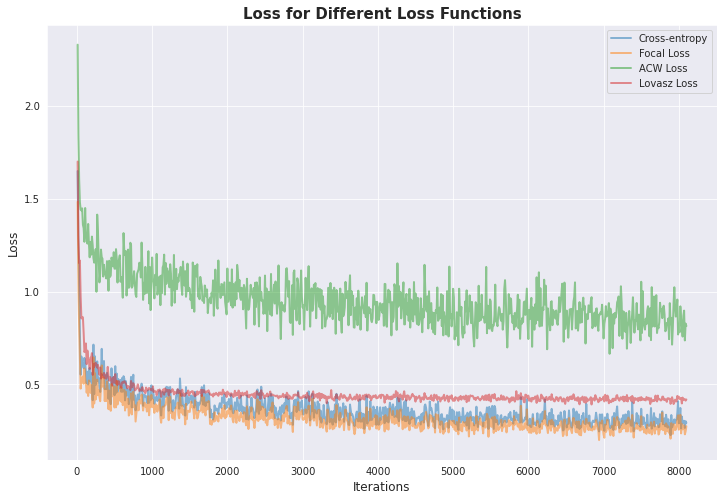

In [93]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(cross_e_train_df.Iterations,   cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
plt.plot(focal_loss_train_df.Iterations, focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(acw_loss_train_df.Iterations, acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
plt.plot(lovasz_loss_train_df.Iterations, lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

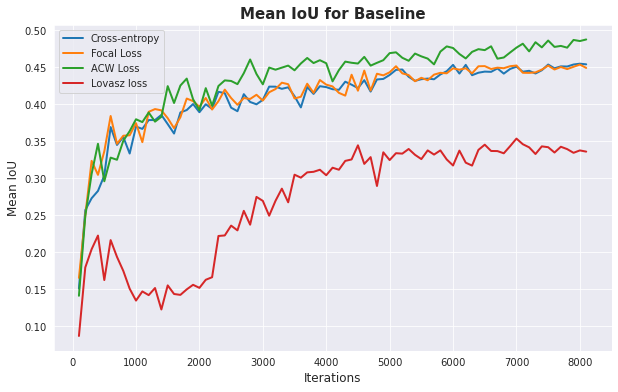

In [94]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(cross_e_df.Iterations,  cross_e_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(focal_loss_df.Iterations, focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(acw_loss_df.Iterations, acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
plt.plot(lovasz_loss_df.Iterations, lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

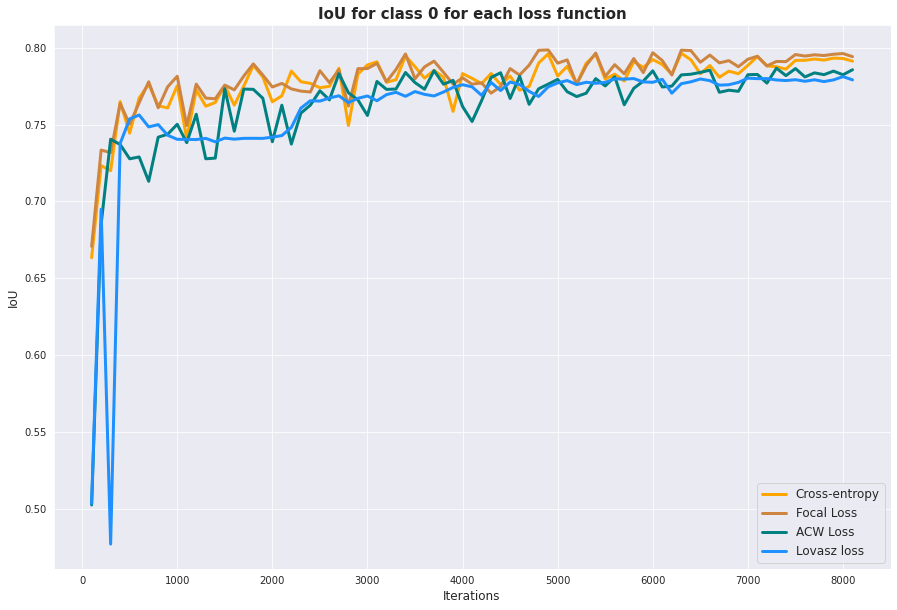

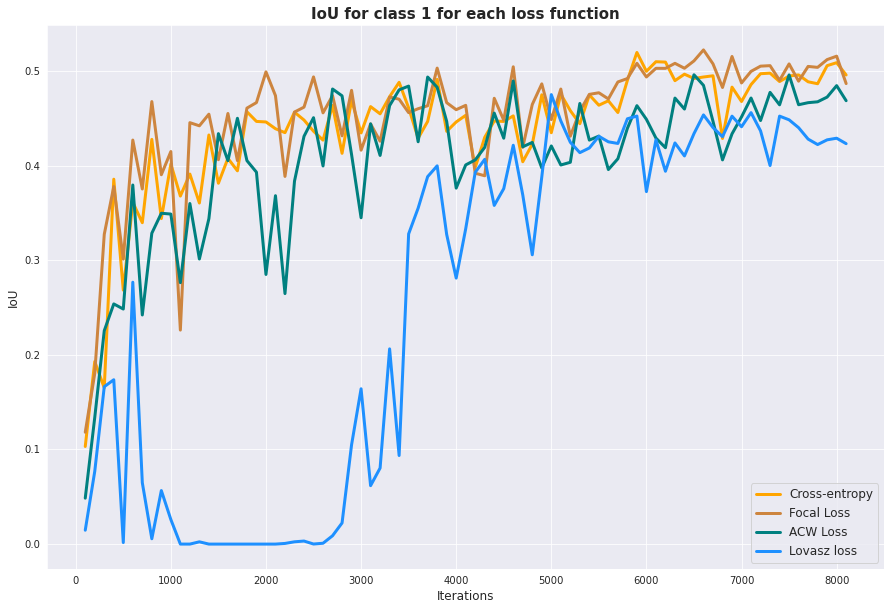

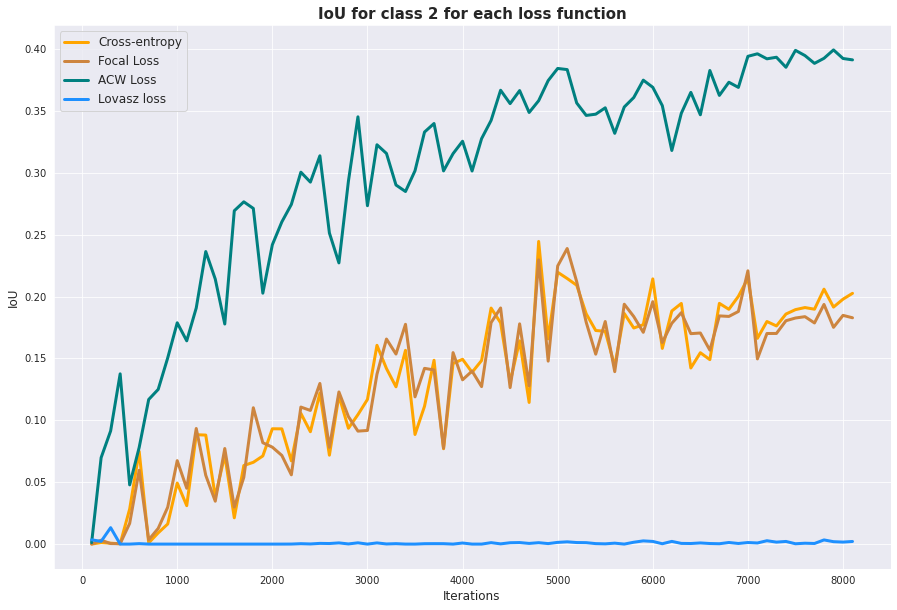

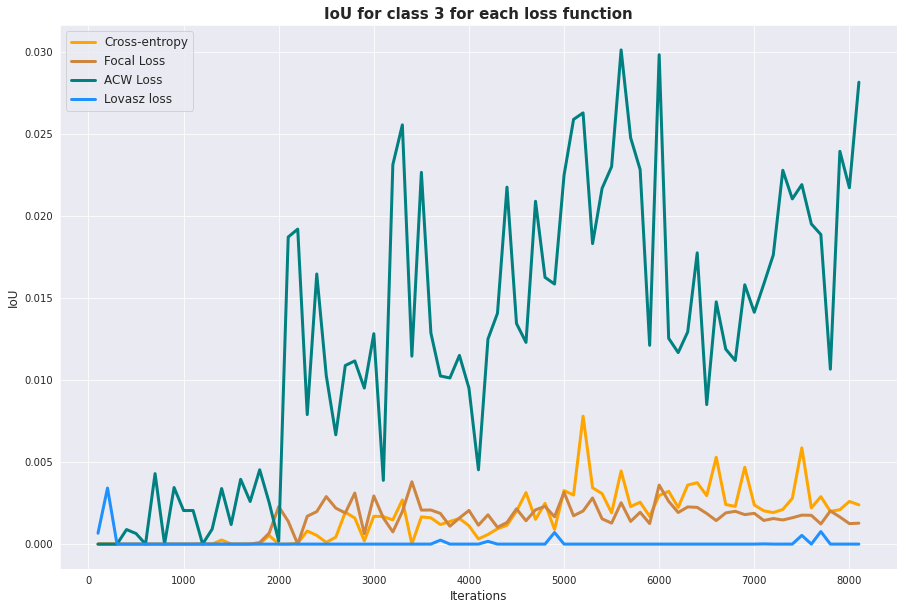

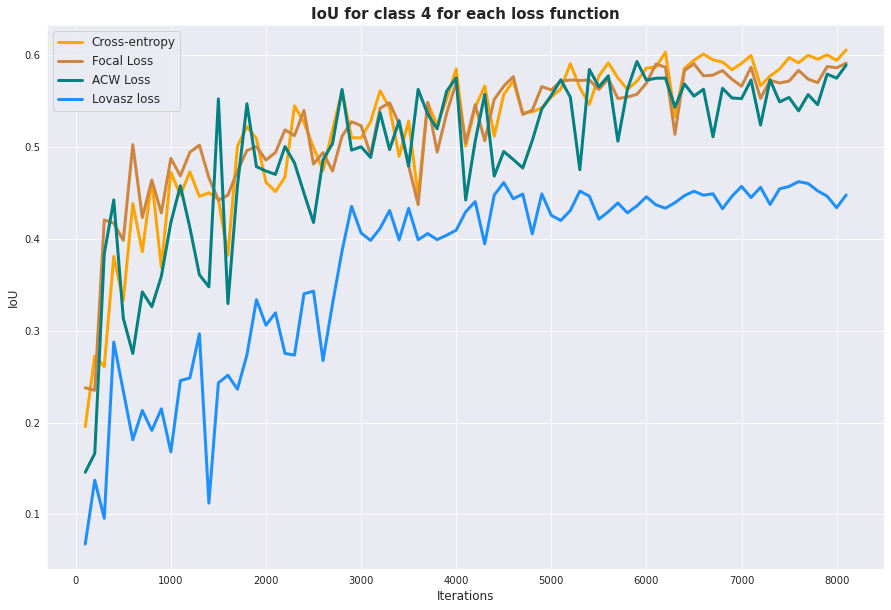

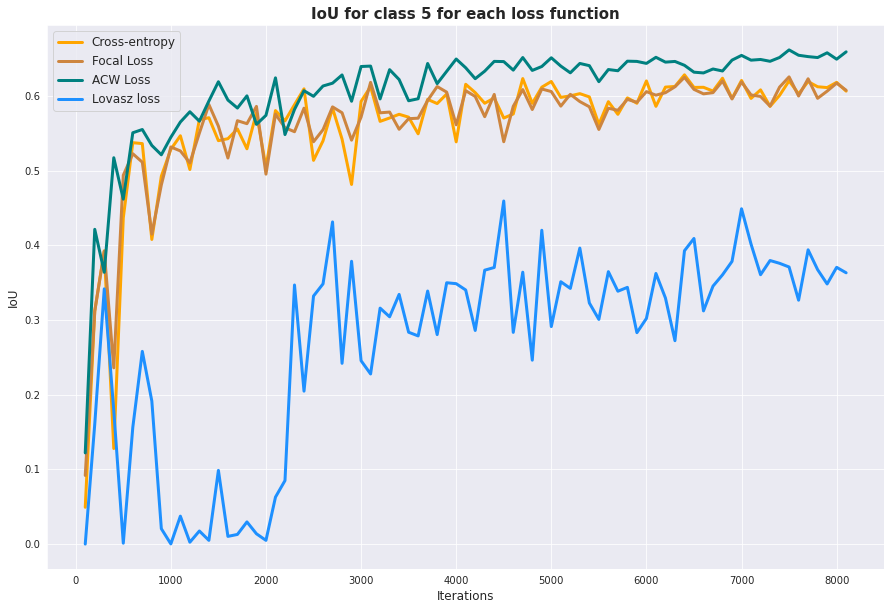

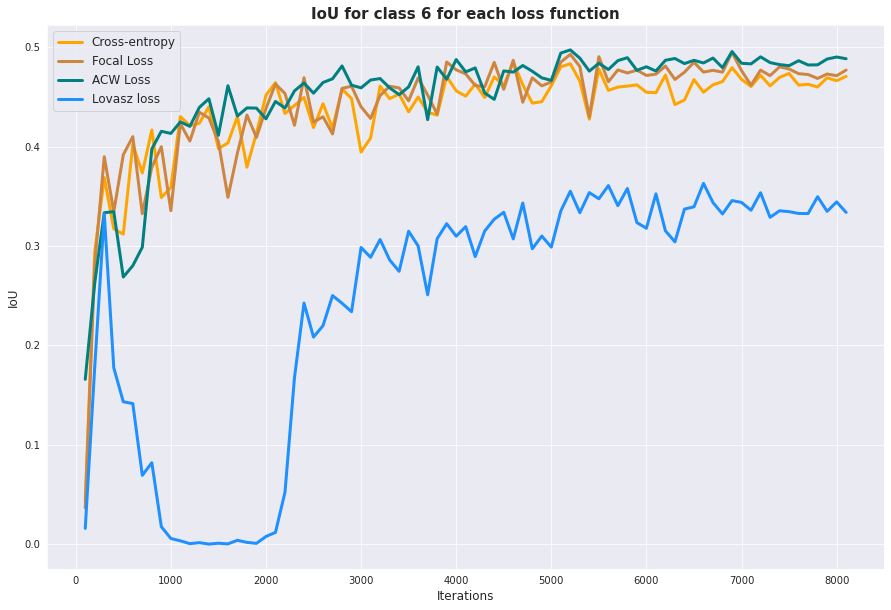

In [162]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(cross_e_df.Iterations,  cross_e_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(focal_loss_df.Iterations,  focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(acw_loss_df.Iterations,  acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
    plt.plot(lovasz_loss_df.Iterations, lovasz_loss_df[f'Class {class_} IoU'], 
             label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-class-{class_}.png')
    plt.show()

## 3. Results of using augmented data

## 3.1 Augmentation 1

In [12]:
loss_fns = ['cross_entropy', 'focal_loss', 'acw_loss', 'lovasz_loss']
aug1_dfs_eval = []
aug1_dfs_train = []
for loss_fn in loss_fns:
    aug1_results = f"./results_augmentations/aug_1/deeplabv3plus_resnet50/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(aug1_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(aug1_results, 'os_32/train_results.csv'))
    aug1_dfs_eval.append(df)
    aug1_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [13]:
aug1_cross_df = aug1_dfs_eval[0]
aug1_cross_df[aug1_cross_df['Mean IoUs'] == aug1_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
79       5        8000   0.439826     0.790793     0.495189     0.096075   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
79     0.002088     0.601343     0.625218     0.468078    0.543954   

    Overall Accs.  
79       0.822485

### Focal loss

In [14]:
aug1_focal_loss_df = aug1_dfs_eval[1]
aug1_focal_loss_df[aug1_focal_loss_df['Mean IoUs'] == aug1_focal_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
66       5        6700   0.432411     0.787152     0.507414     0.075208   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
66     0.000198     0.571335     0.619171     0.466399    0.540142   

    Overall Accs.  
66       0.819809

### ACW loss

In [99]:
aug1_acw_loss_df = aug1_dfs_eval[2]
aug1_acw_loss_df[aug1_acw_loss_df['Mean IoUs'] == aug1_acw_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
58       4        5900   0.462084     0.783088     0.492974     0.237072   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
58     0.033735     0.572853     0.630812     0.484051    0.625819   

    Overall Accs.  
58       0.818451

### Lovasz loss

In [100]:
aug1_lovasz_df = aug1_dfs_eval[3]
aug1_lovasz_df[aug1_lovasz_df['Mean IoUs'] == aug1_lovasz_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
69       5        7000   0.351623     0.782167     0.456404     0.004762   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
69          0.0     0.447678     0.394501     0.375849     0.45087   

    Overall Accs.  
69       0.803759

### Training Loss visualization

In [101]:
aug1_cross_e_train_df = aug1_dfs_train[0]
aug1_focal_loss_train_df = aug1_dfs_train[1]
aug1_acw_loss_train_df = aug1_dfs_train[2]
aug1_lovasz_loss_train_df = aug1_dfs_train[3]

Text(0, 0.5, 'Loss')

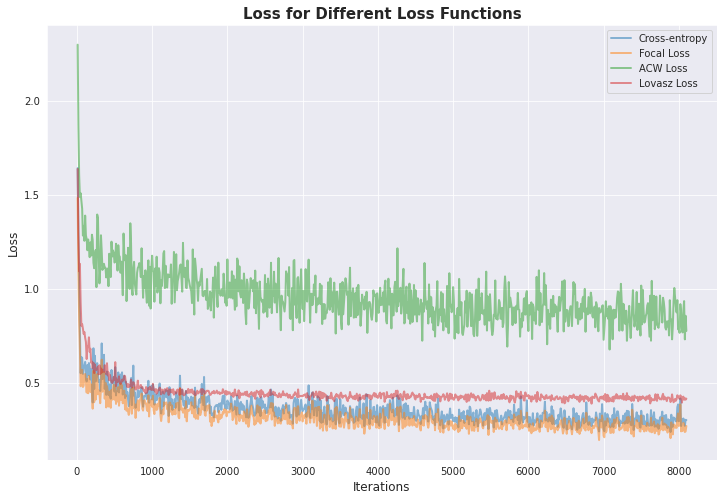

In [102]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(aug1_cross_e_train_df.Iterations, aug1_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
plt.plot(aug1_focal_loss_train_df.Iterations, aug1_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(aug1_acw_loss_train_df.Iterations, aug1_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
plt.plot(aug1_lovasz_loss_train_df.Iterations, aug1_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

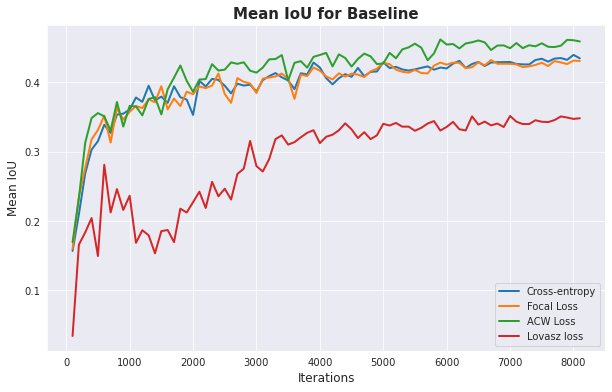

In [103]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(aug1_cross_df.Iterations, aug1_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(aug1_focal_loss_df.Iterations, aug1_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(aug1_acw_loss_df.Iterations, aug1_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
plt.plot(aug1_lovasz_df.Iterations, aug1_lovasz_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

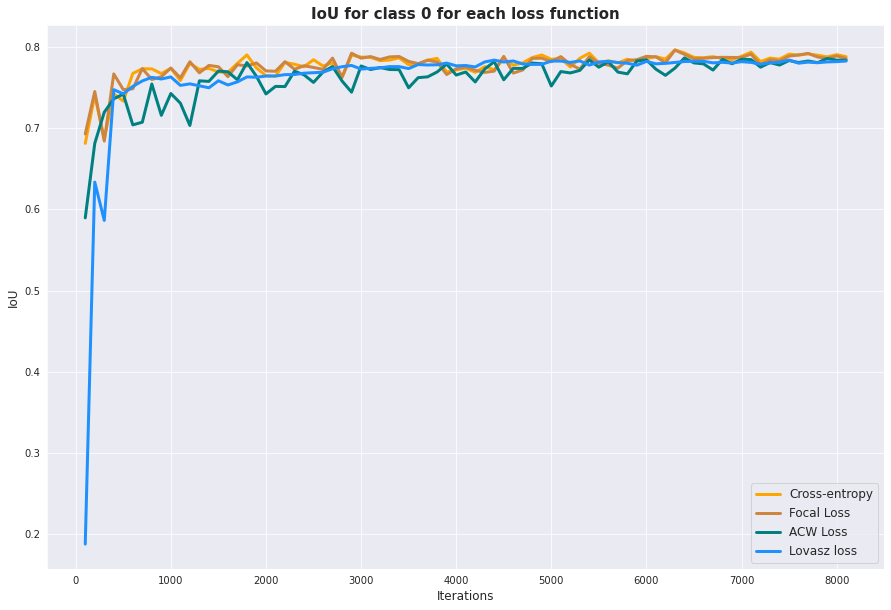

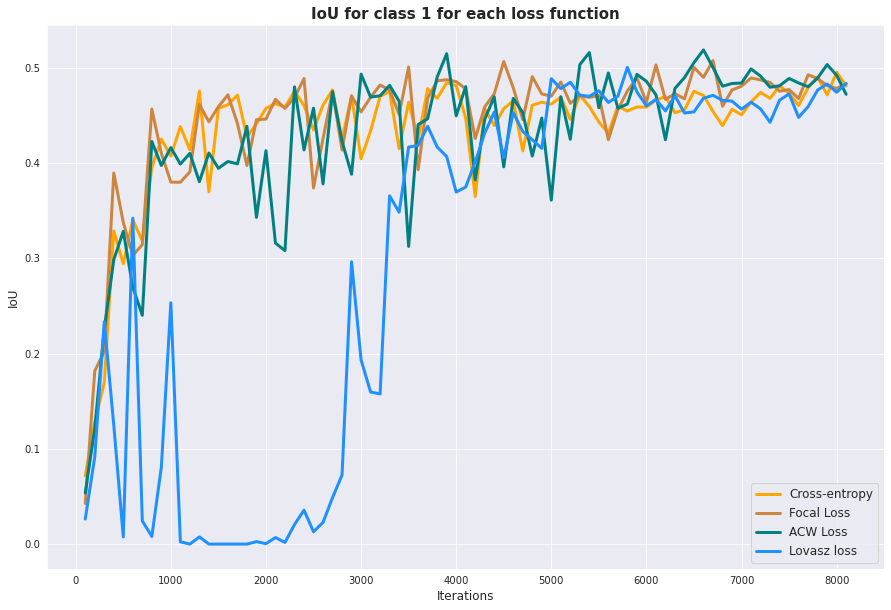

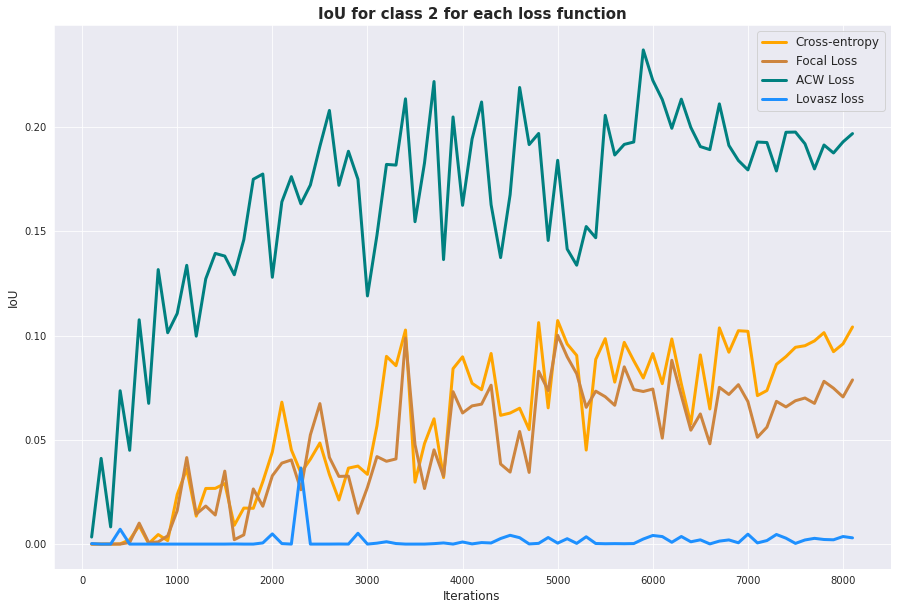

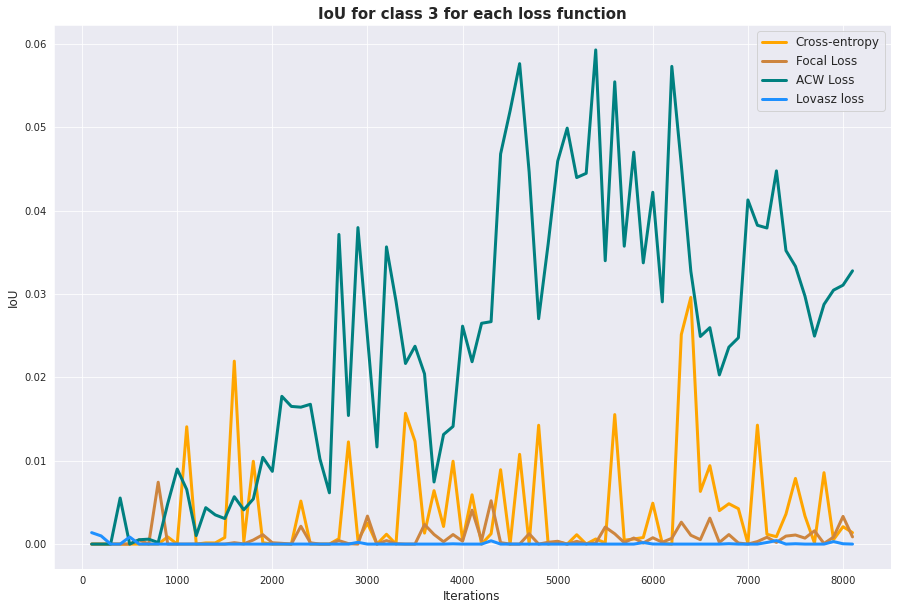

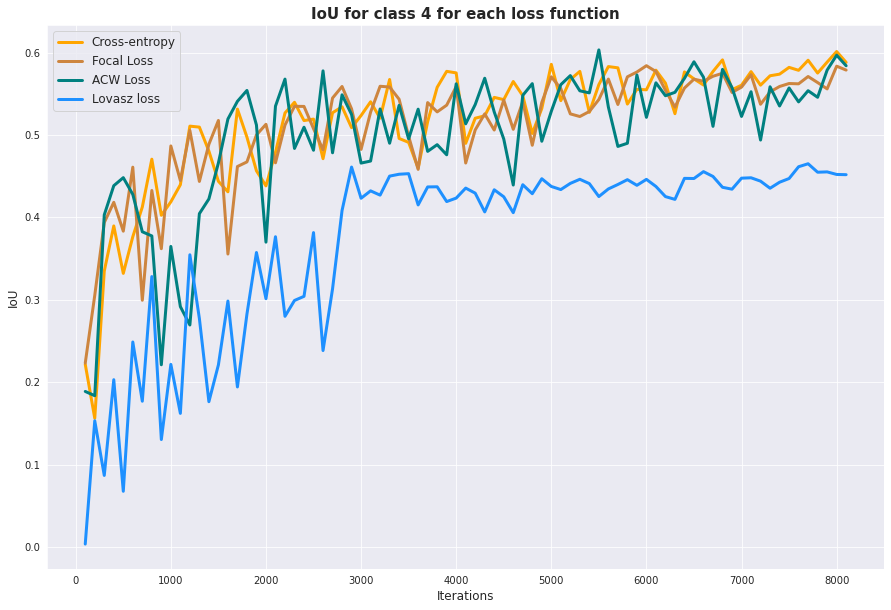

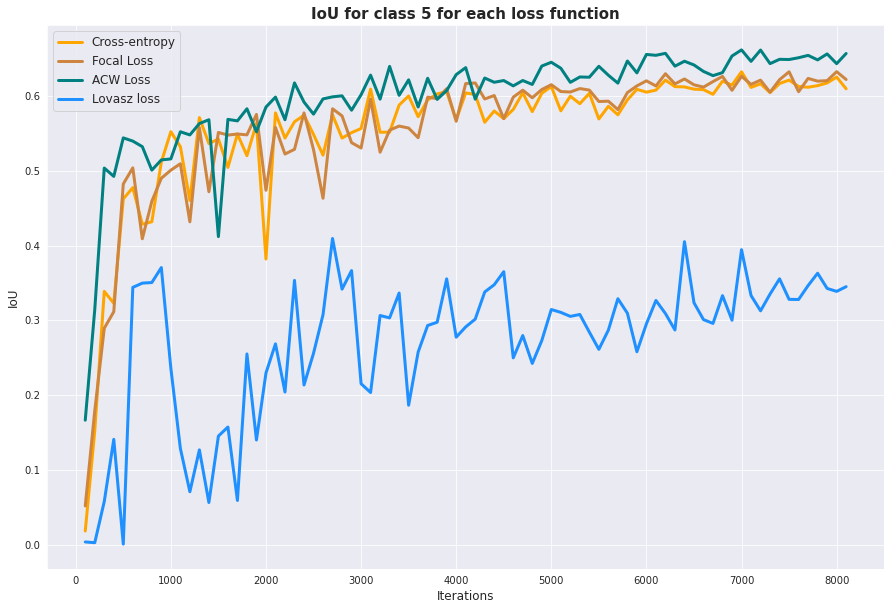

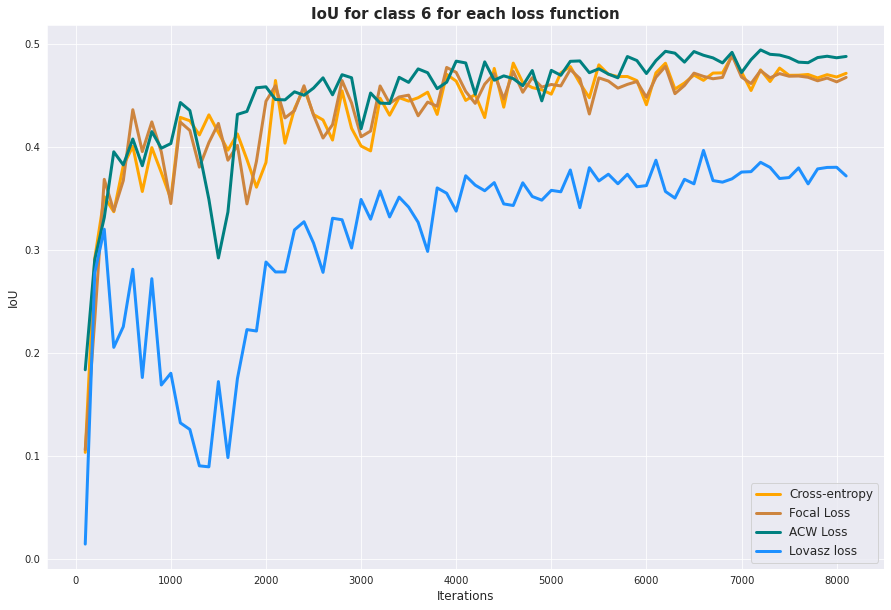

In [164]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(aug1_cross_df.Iterations,  aug1_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(aug1_focal_loss_df.Iterations,  aug1_focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(aug1_acw_loss_df.Iterations,  aug1_acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
    plt.plot(aug1_lovasz_df.Iterations, aug1_lovasz_df[f'Class {class_} IoU'], 
             label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-aug1-class-{class_}.png')
    plt.show()

## 3.2 Augmentation 2

In [105]:
loss_fns = ['cross_entropy', 'focal_loss', 'acw_loss', 'lovasz_loss']
aug2_dfs_eval = []
aug2_dfs_train = []
for loss_fn in loss_fns:
    aug2_results = f"./results_augmentations/aug_2/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(aug2_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(aug2_results, 'os_32/train_results.csv'))
    aug2_dfs_eval.append(df)
    aug2_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [106]:
aug2_cross_df = aug2_dfs_eval[0]
aug2_cross_df[aug2_cross_df['Mean IoUs'] == aug2_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
64       5        6500   0.424957     0.779801     0.512201     0.000177   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
64          0.0     0.589383     0.622026     0.471111    0.529316   

    Overall Accs.  
64       0.815035

### Focal loss

In [107]:
aug2_focal_loss_df = aug2_dfs_eval[1]
aug2_focal_loss_df[aug2_focal_loss_df['Mean IoUs'] == aug2_focal_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
64       5        6500   0.424971     0.779895     0.510004     0.000595   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
64          0.0     0.602821     0.619805     0.461679    0.527628   

    Overall Accs.  
64       0.814276

### ACW loss

In [108]:
aug2_acw_loss_df = aug2_dfs_eval[2]
aug2_acw_loss_df[aug2_acw_loss_df['Mean IoUs'] == aug2_acw_loss_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
70       5        7100   0.433417     0.777845     0.487006     0.074411   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
70     0.001331     0.574665     0.653473     0.465187    0.565981   

    Overall Accs.  
70       0.812204

### Lovasz loss

In [109]:
aug2_lovasz_df = aug2_dfs_eval[3]
aug2_lovasz_df[aug2_lovasz_df['Mean IoUs'] == aug2_lovasz_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
77       5        7800    0.37864     0.782956     0.467756     0.002222   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
77          0.0     0.473876     0.565165     0.358506    0.486391   

    Overall Accs.  
77       0.805092

### Training Loss visualization

In [110]:
aug2_cross_e_train_df = aug2_dfs_train[0]
aug2_focal_loss_train_df = aug2_dfs_train[1]
aug2_acw_loss_train_df = aug2_dfs_train[2]
aug2_lovasz_loss_train_df = aug2_dfs_train[3]

Text(0, 0.5, 'Loss')

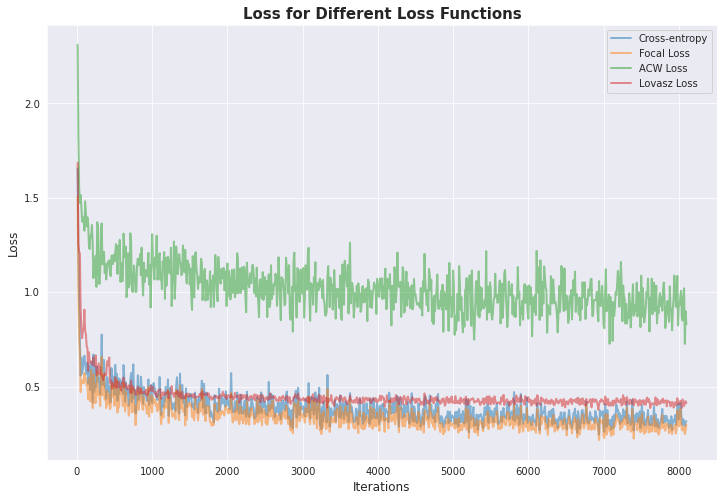

In [111]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(aug2_cross_e_train_df.Iterations, aug2_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
plt.plot(aug2_focal_loss_train_df.Iterations, aug2_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(aug2_acw_loss_train_df.Iterations, aug2_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
plt.plot(aug2_lovasz_loss_train_df.Iterations, aug2_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

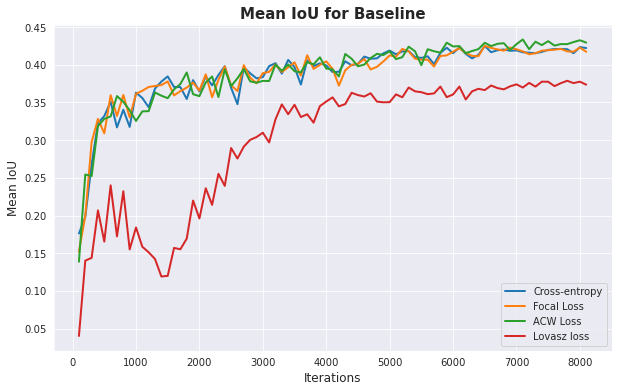

In [112]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(aug2_cross_df.Iterations, aug2_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(aug2_focal_loss_df.Iterations, aug2_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(aug2_acw_loss_df.Iterations, aug2_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
plt.plot(aug2_lovasz_df.Iterations, aug2_lovasz_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

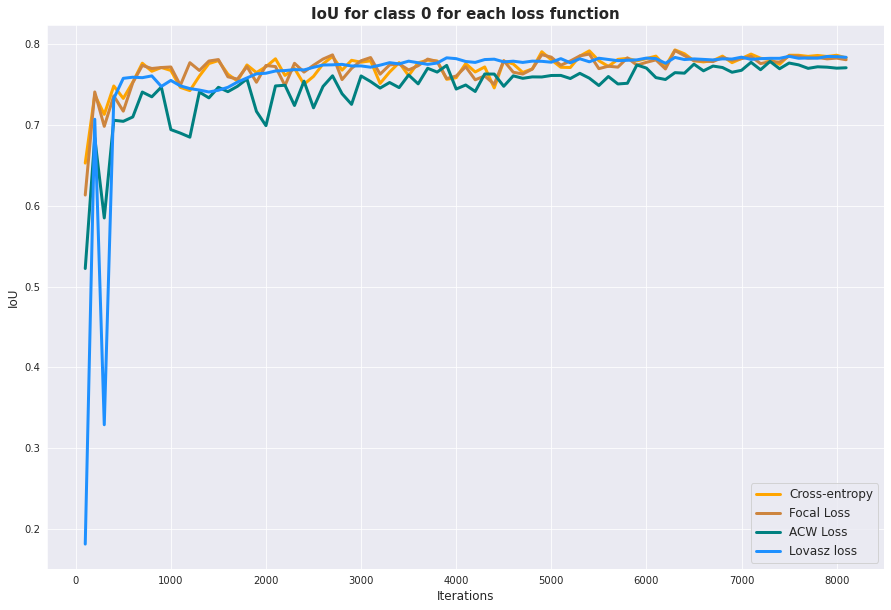

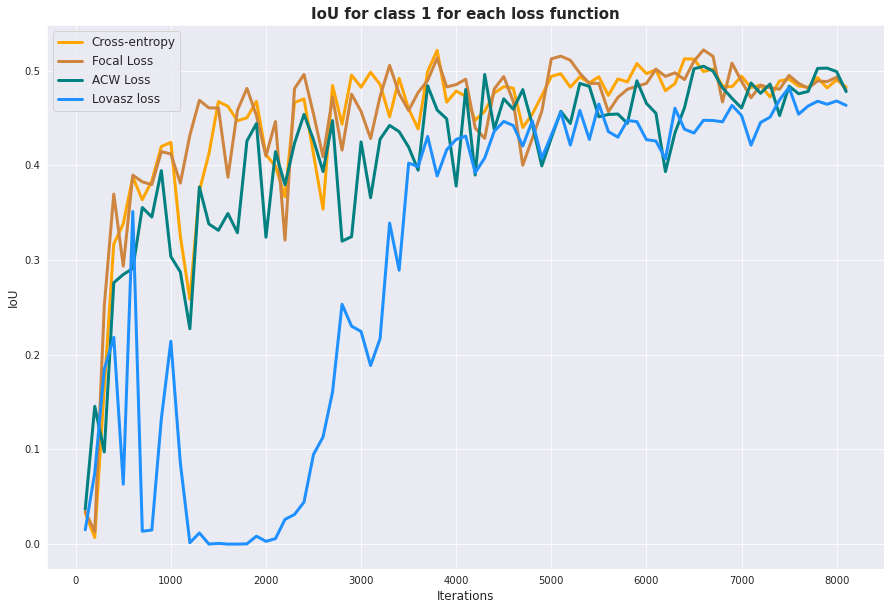

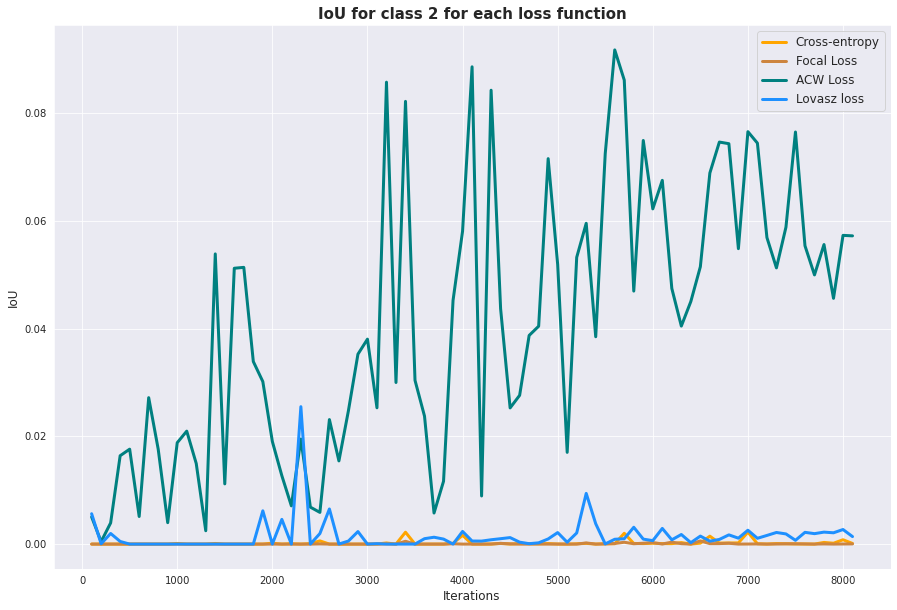

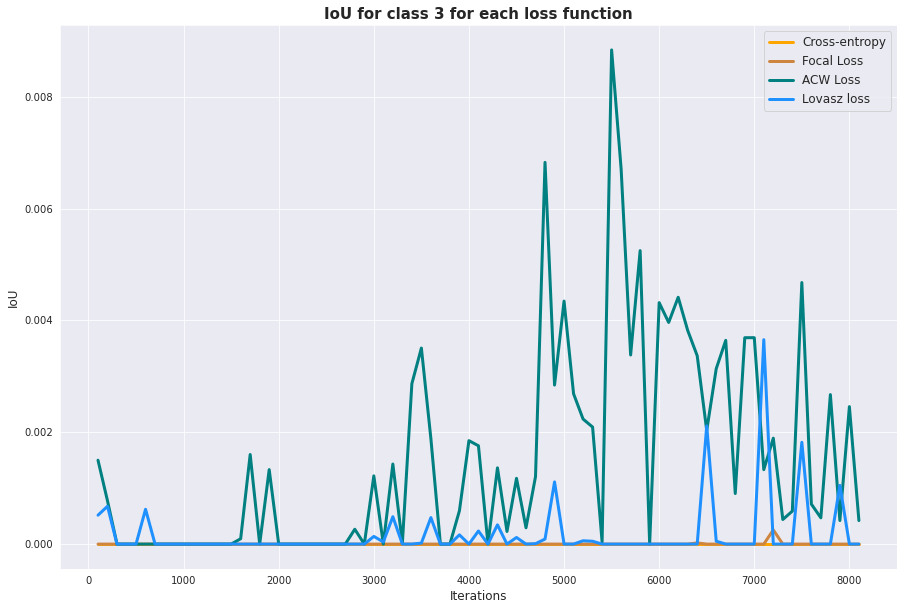

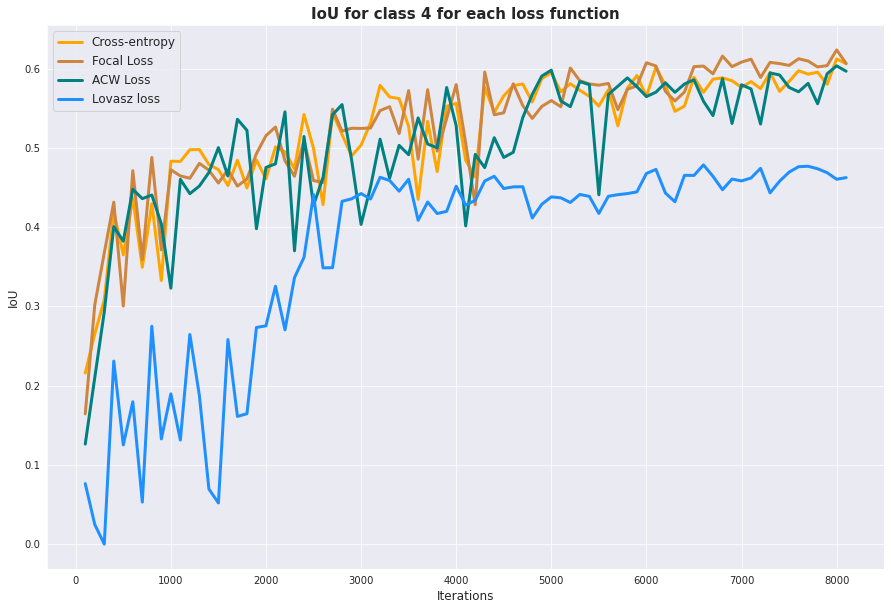

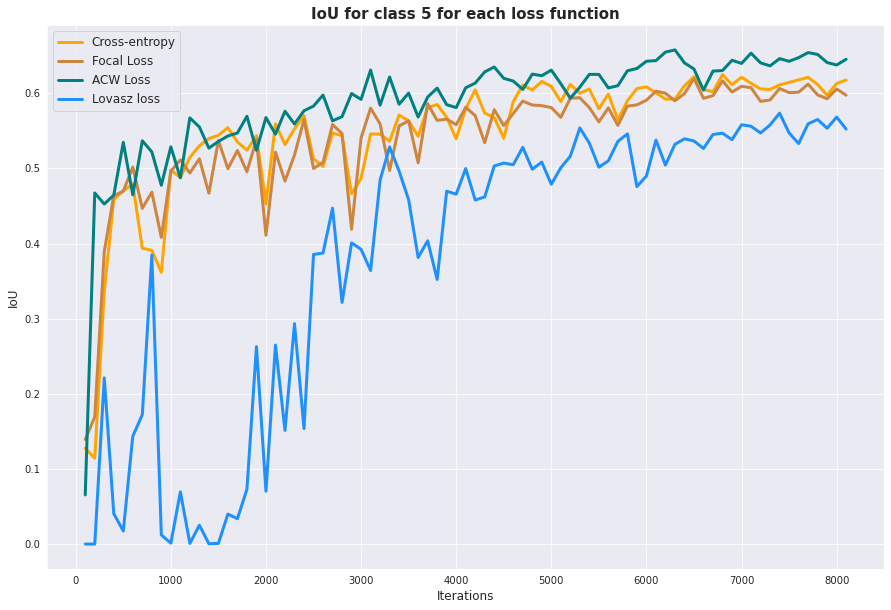

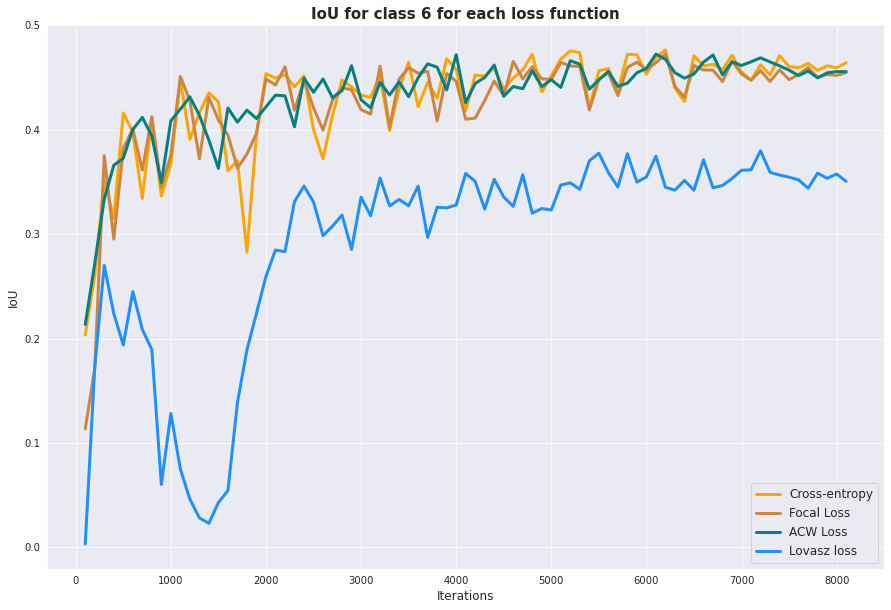

In [165]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(aug2_cross_df.Iterations,  aug2_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(aug2_focal_loss_df.Iterations,  aug2_focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(aug2_acw_loss_df.Iterations,  aug2_acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
    plt.plot(aug2_lovasz_df.Iterations, aug2_lovasz_df[f'Class {class_} IoU'], 
             label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-aug2-class-{class_}.png')
    plt.show()

## 3.3 Augmentation 3

In [114]:
loss_fns = ['cross_entropy']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
aug3_dfs_eval = []
aug3_dfs_train = []
for loss_fn in loss_fns:
    aug3_results = f"./results_augmentations/aug_3/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(aug2_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(aug2_results, 'os_32/train_results.csv'))
    aug3_dfs_eval.append(df)
    aug3_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [115]:
aug3_cross_df = aug3_dfs_eval[0]
aug3_cross_df[aug3_cross_df['Mean IoUs'] == aug3_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
77       5        7800    0.37864     0.782956     0.467756     0.002222   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
77          0.0     0.473876     0.565165     0.358506    0.486391   

    Overall Accs.  
77       0.805092

### Focal loss

In [116]:
# aug3_focal_loss_df = aug3_dfs_eval[1]
# aug3_focal_loss_df[aug3_focal_loss_df['Mean IoUs'] == aug3_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [117]:
# aug3_acw_loss_df = aug3_dfs_eval[2]
# aug3_acw_loss_df[aug3_acw_loss_df['Mean IoUs'] == aug3_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [118]:
# aug3_lovasz_df = aug3_dfs_eval[3]
# aug3_lovasz_df[aug3_lovasz_df['Mean IoUs'] == aug3_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [119]:
aug3_cross_e_train_df = aug3_dfs_train[0]
# aug3_focal_loss_train_df = aug3_dfs_train[1]
# aug3_acw_loss_train_df = aug3_dfs_train[2]
# aug3_lovasz_loss_train_df = aug3_dfs_train[3]

Text(0, 0.5, 'Loss')

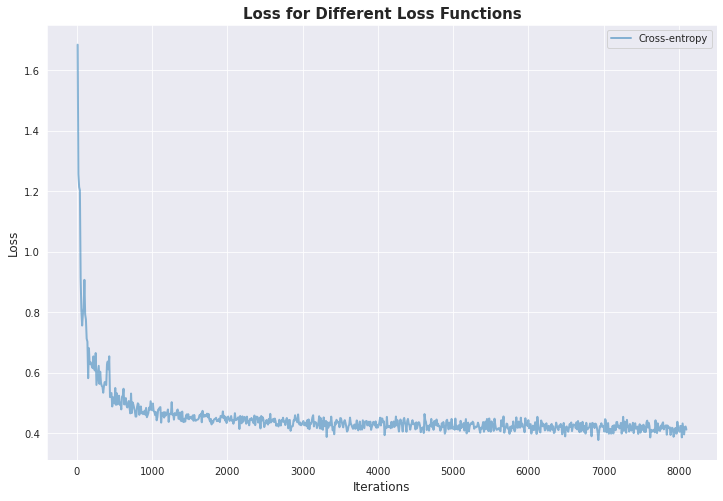

In [120]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(aug3_cross_e_train_df.Iterations, aug3_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(aug3_focal_loss_train_df.Iterations, aug3_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(aug3_acw_loss_train_df.Iterations, aug3_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
# plt.plot(aug3_lovasz_loss_train_df.Iterations, aug3_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

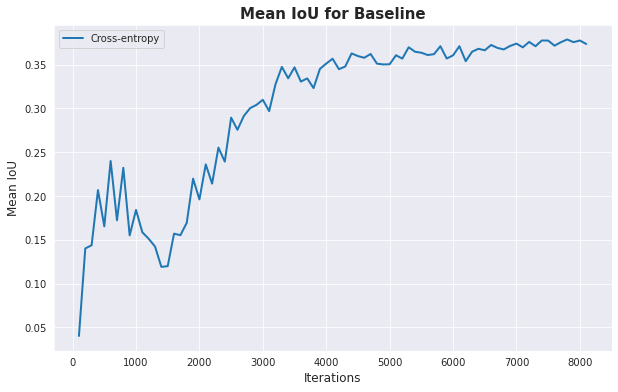

In [121]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(aug3_cross_df.Iterations, aug3_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(aug3_focal_loss_df.Iterations, aug3_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
# plt.plot(aug3_acw_loss_df.Iterations, aug3_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
# plt.plot(aug3_lovasz_df.Iterations, aug3_lovasz_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

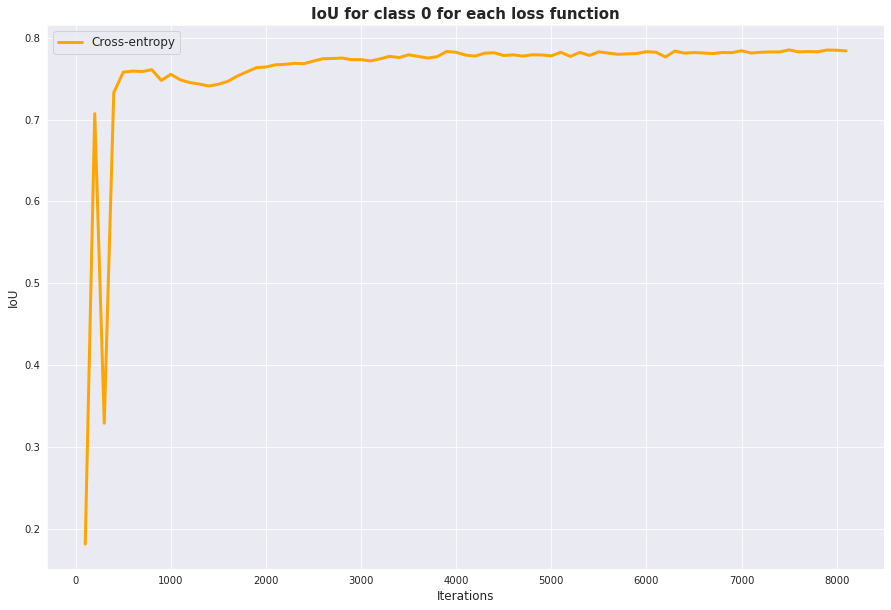

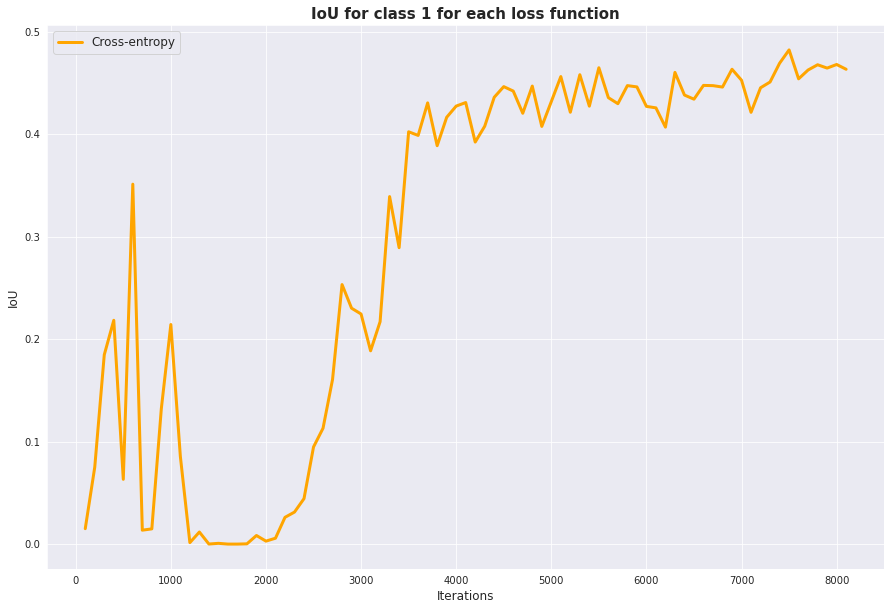

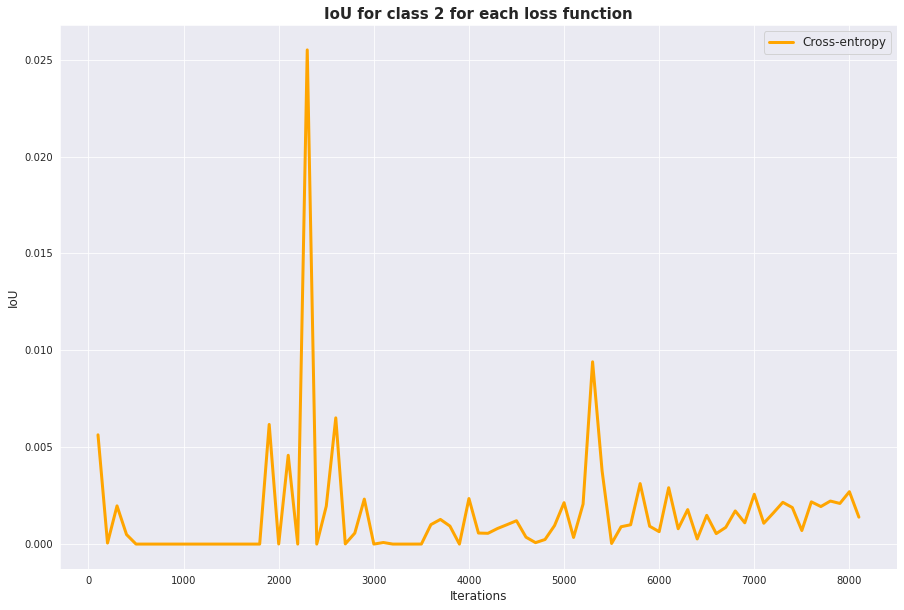

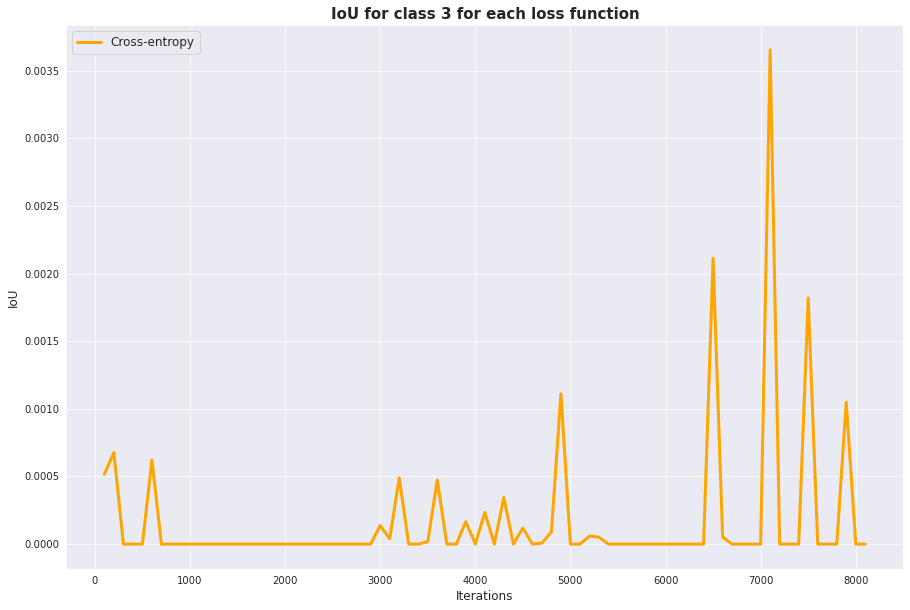

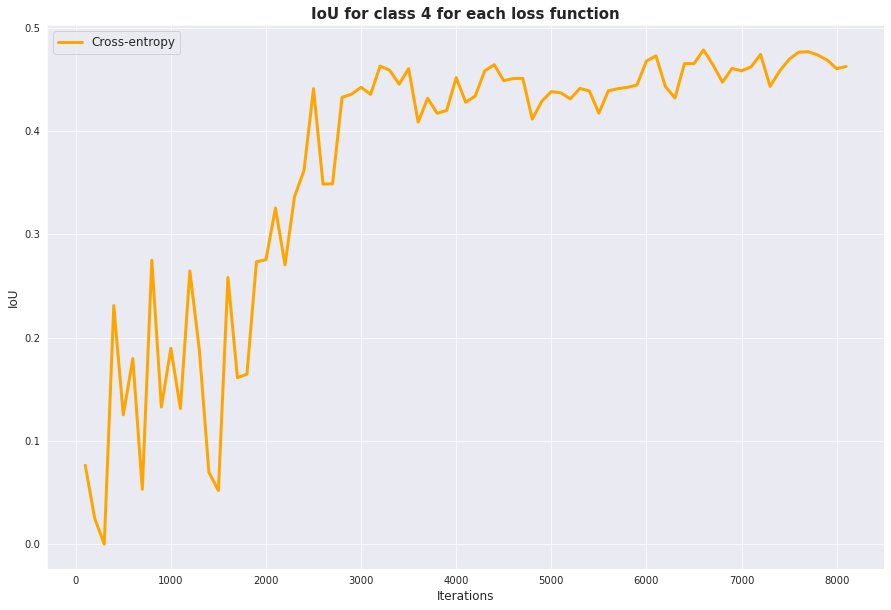

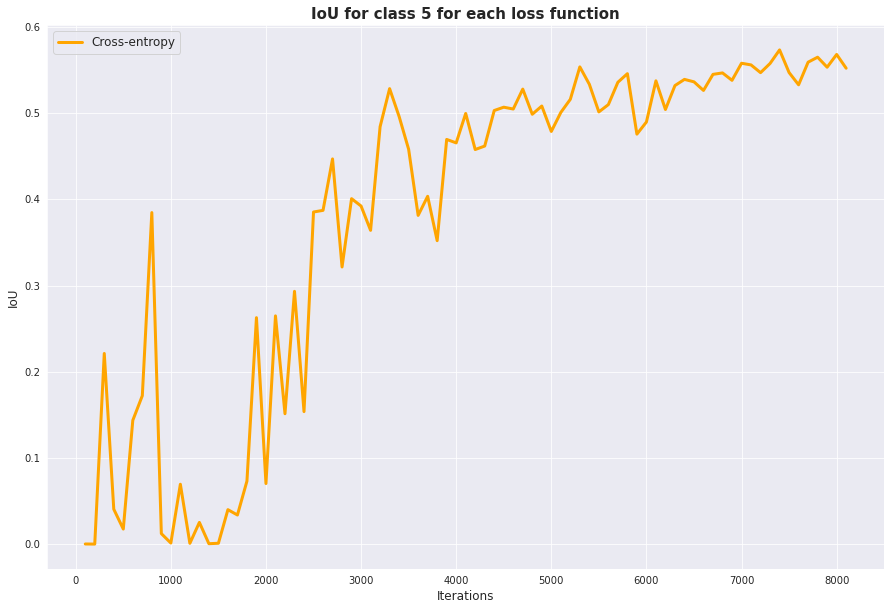

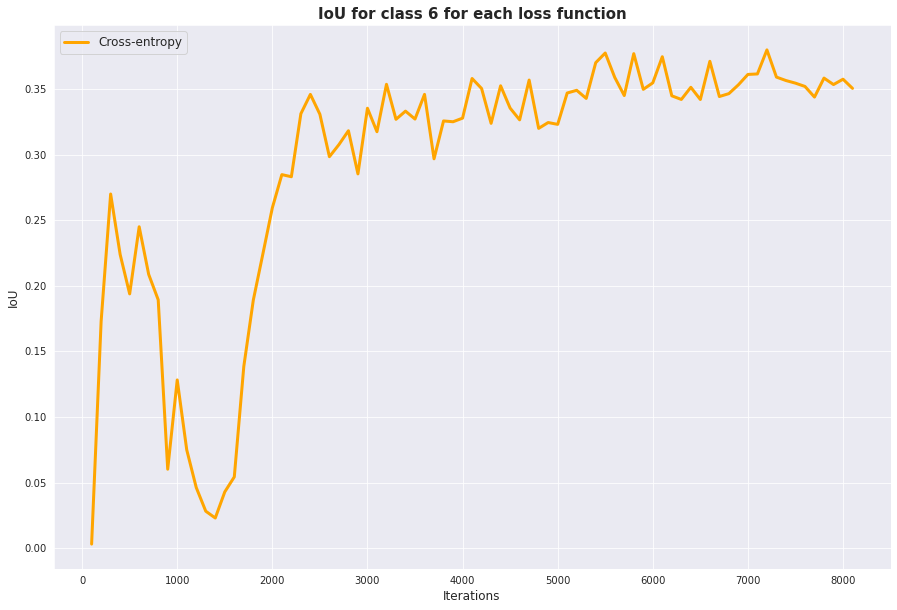

In [166]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(aug3_cross_df.Iterations,  aug3_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(aug3_focal_loss_df.Iterations,  aug3_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
#     plt.plot(aug3_acw_loss_df.Iterations,  aug3_acw_loss_df[f'Class {class_} IoU'], 
#              label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(aug3_lovasz_df.Iterations, aug3_lovasz_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-aug3-class-{class_}.png')
    plt.show()

## 3. Results of oversampling

## 3.1 Oversampling 1

In [123]:
loss_fns = ['cross_entropy']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
overs1_dfs_eval = []
overs1_dfs_train = []
for loss_fn in loss_fns:
    overs1_results = f"./oversample_results/ovs1/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(overs1_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(overs1_results, 'os_32/train_results.csv'))
    overs1_dfs_eval.append(df)
    overs1_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [124]:
overs1_cross_df = overs1_dfs_eval[0]
overs1_cross_df[overs1_cross_df['Mean IoUs'] == overs1_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
54       4        5500   0.443221     0.753917     0.487604     0.205509   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
54     0.001252     0.603971     0.578438     0.471852      0.6131   

    Overall Accs.  
54        0.79602

### Focal loss

In [125]:
# overs1_focal_loss_df = overs1_dfs_eval[1]
# overs1_focal_loss_df[overs1_focal_loss_df['Mean IoUs'] == overs1_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [126]:
# overs1_acw_loss_df = overs1_dfs_eval[2]
# overs1_acw_loss_df[overs1_acw_loss_df['Mean IoUs'] == overs1_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [127]:
# overs1_lovasz_df = overs1_dfs_eval[3]
# overs1_lovasz_df[overs1_lovasz_df['Mean IoUs'] == overs1_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [128]:
overs1_cross_e_train_df = overs1_dfs_train[0]
# overs1_focal_loss_train_df = overs1_dfs_train[1]
# overs1_acw_loss_train_df = overs1_dfs_train[2]
#overs1_lovasz_loss_train_df = overs1_dfs_train[3]

Text(0, 0.5, 'Loss')

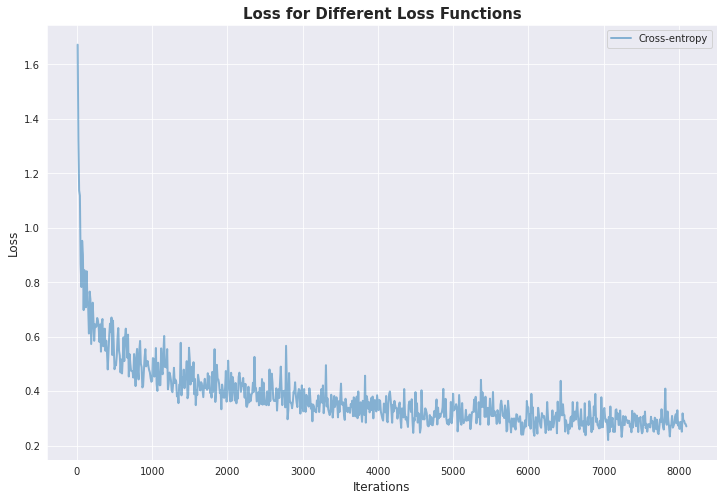

In [129]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(overs1_cross_e_train_df.Iterations, overs1_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(overs1_focal_loss_train_df.Iterations, overs1_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(overs1_acw_loss_train_df.Iterations, overs1_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
#plt.plot(overs1_lovasz_loss_train_df.Iterations, overs1_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

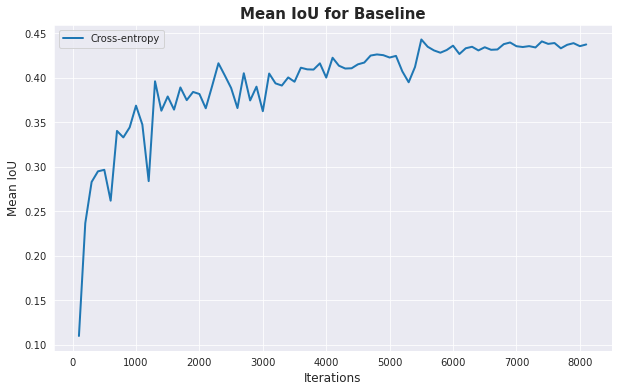

In [130]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(overs1_cross_df.Iterations, overs1_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(overs1_focal_loss_df.Iterations, overs1_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
# plt.plot(overs1_acw_loss_df.Iterations, overs1_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
# plt.plot(overs1_lovasz_loss_df.Iterations, overs1_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

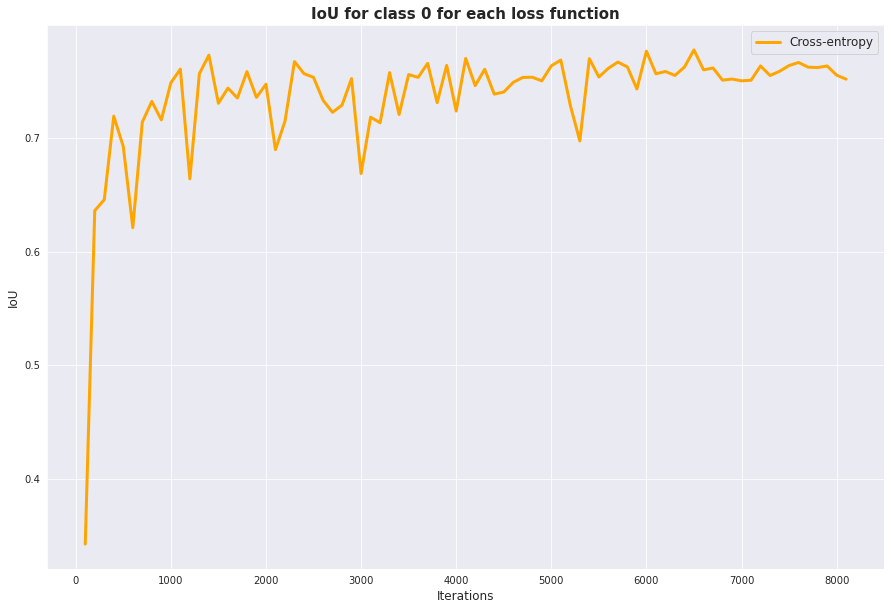

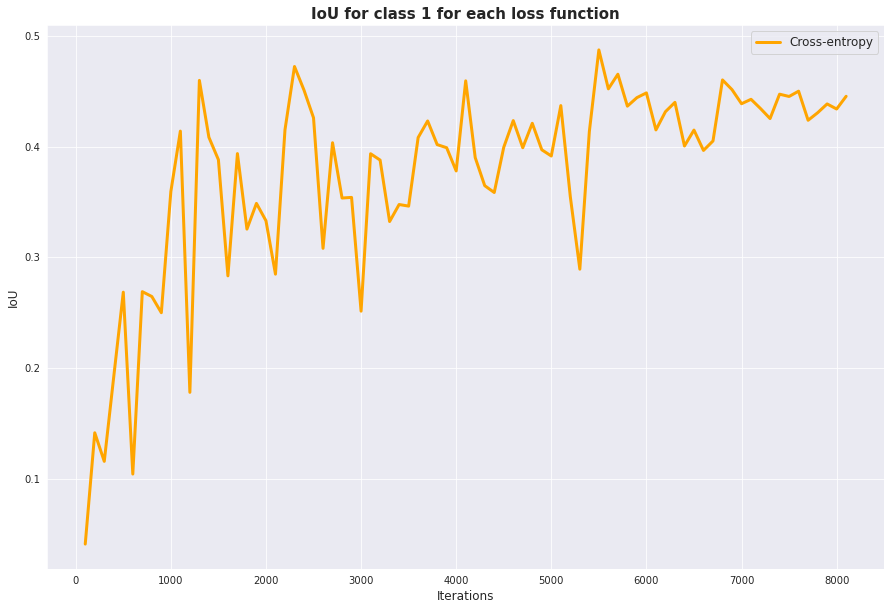

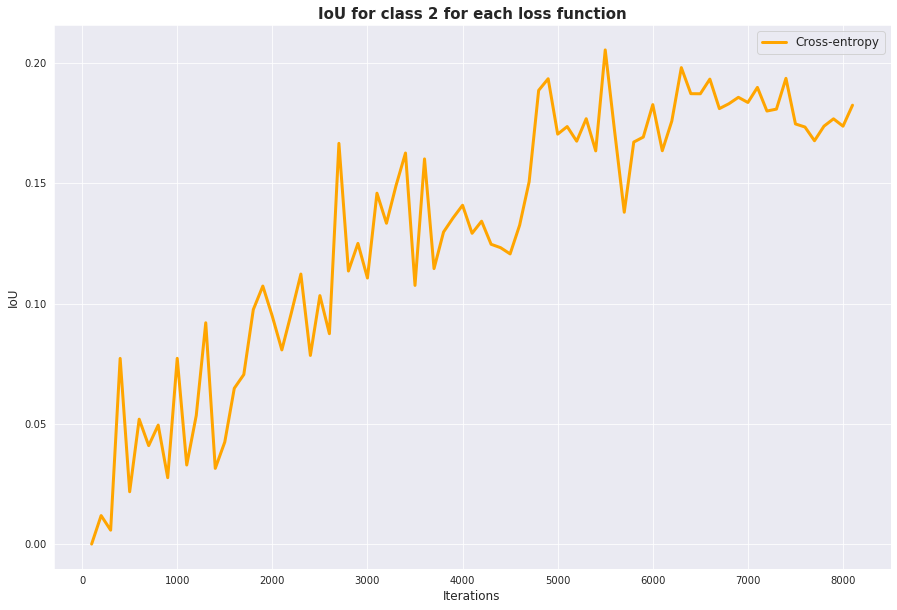

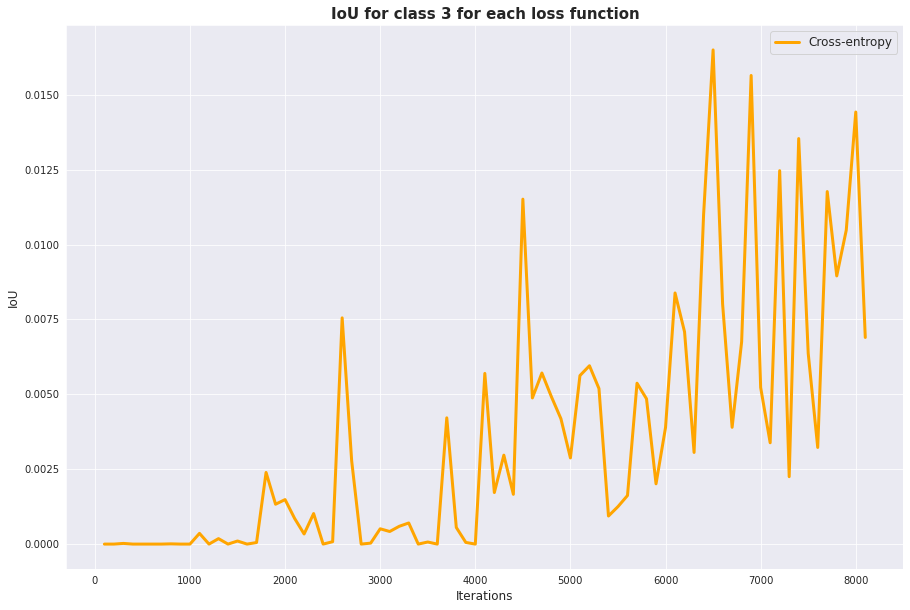

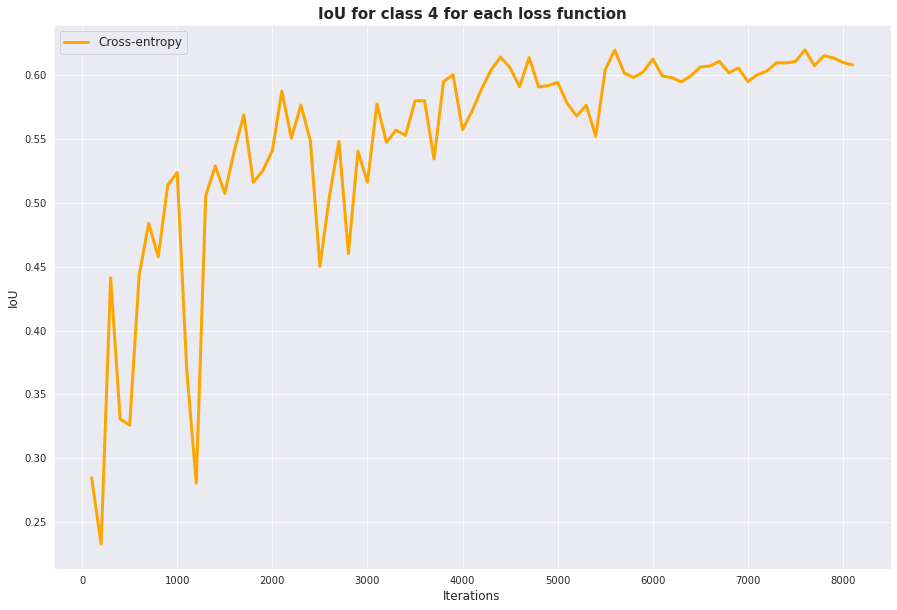

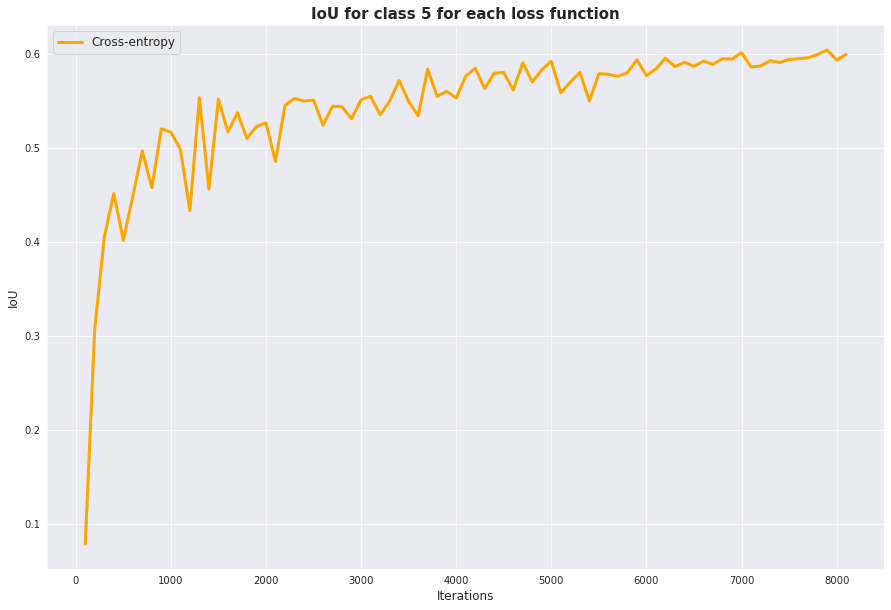

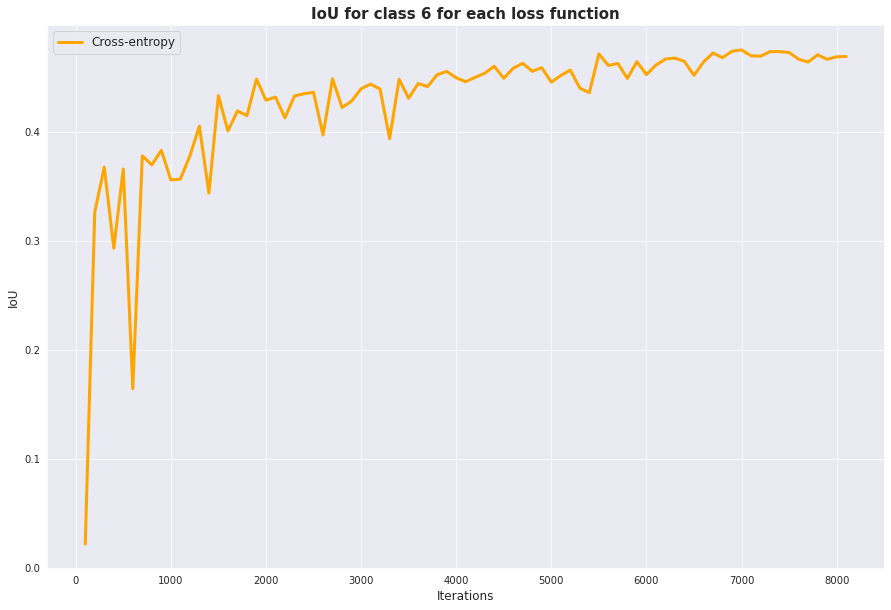

In [167]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(overs1_cross_df.Iterations,  overs1_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(overs1_focal_loss_df.Iterations,  overs1_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
#     plt.plot(overs1_acw_loss_df.Iterations,  overs1_acw_loss_df[f'Class {class_} IoU'], 
#              label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(overs1_lovasz_loss_df.Iterations, overs1_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-ovs1-class-{class_}.png')
    plt.show()

## 3.2 Oversampling 2

In [132]:
loss_fns = ['cross_entropy']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
overs2_dfs_eval = []
overs2_dfs_train = []
for loss_fn in loss_fns:
    overs2_results = f"./oversample_results/ovs2/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(overs2_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(overs2_results, 'os_32/train_results.csv'))
    overs2_dfs_eval.append(df)
    overs2_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [133]:
overs2_cross_df = overs2_dfs_eval[0]
overs2_cross_df[overs2_cross_df['Mean IoUs'] == overs2_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
64       5        6500   0.446993     0.777753     0.409102     0.232845   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
64     0.027611     0.635716     0.579208     0.466718    0.600424   

    Overall Accs.  
64        0.81157

### Focal loss

In [134]:
# overs2_focal_loss_df = overs2_dfs_eval[1]
# overs2_focal_loss_df[overs2_focal_loss_df['Mean IoUs'] == overs2_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [135]:
# overs2_acw_loss_df = overs2_dfs_eval[2]
# overs2_acw_loss_df[overs2_acw_loss_df['Mean IoUs'] == overs2_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [136]:
# overs2_lovasz_df = overs2_dfs_eval[3]
# overs2_lovasz_df[overs2_lovasz_df['Mean IoUs'] == overs2_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [137]:
overs2_cross_e_train_df = overs2_dfs_train[0]
# overs2_focal_loss_train_df = overs2_dfs_train[1]
# overs2_acw_loss_train_df = overs2_dfs_train[2]
# overs2_lovasz_loss_train_df = overs2_dfs_train[3]

Text(0, 0.5, 'Loss')

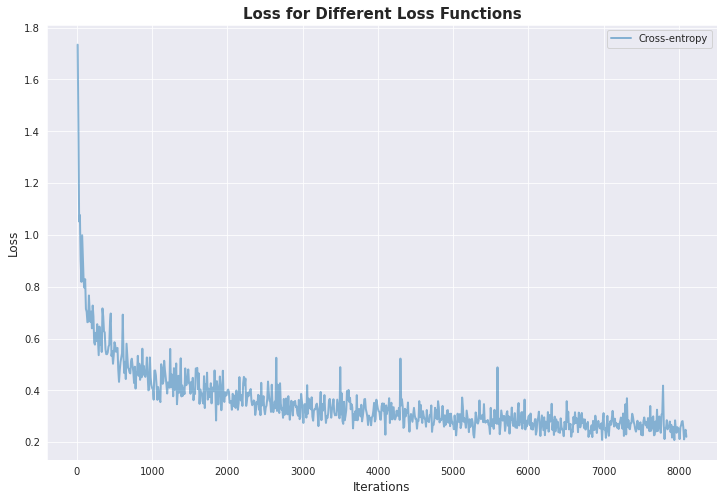

In [138]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(overs2_cross_e_train_df.Iterations, overs2_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(overs2_focal_loss_train_df.Iterations, overs2_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(overs2_acw_loss_train_df.Iterations, overs2_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
# plt.plot(overs2_lovasz_loss_train_df.Iterations, overs2_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

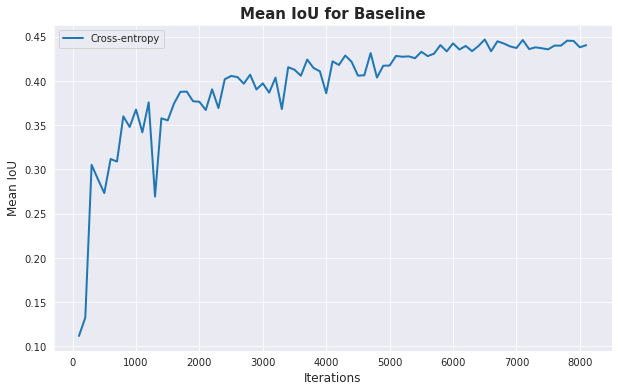

In [139]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(overs2_cross_df.Iterations, overs2_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(overs2_focal_loss_df.Iterations, overs2_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
# plt.plot(overs2_acw_loss_df.Iterations, overs2_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
# plt.plot(overs2_lovasz_loss_df.Iterations, overs2_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

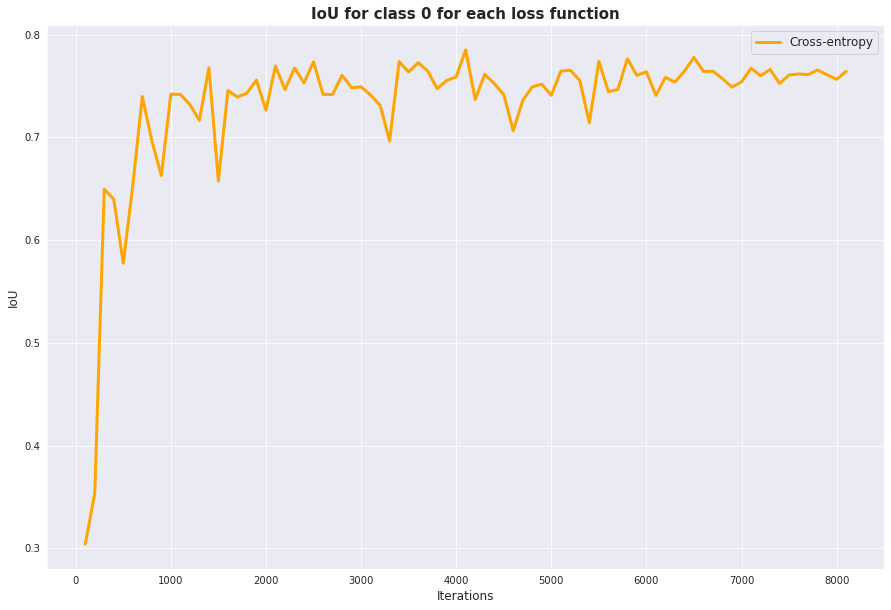

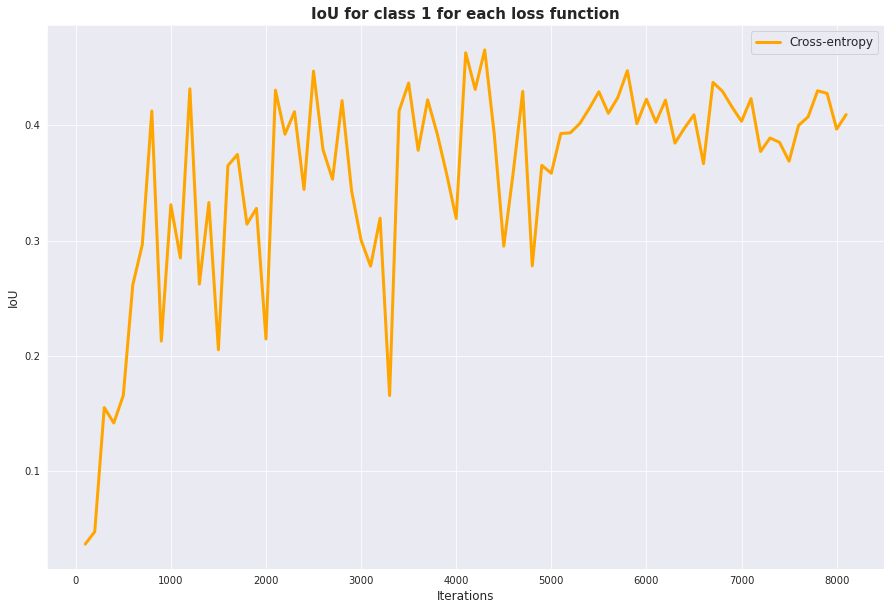

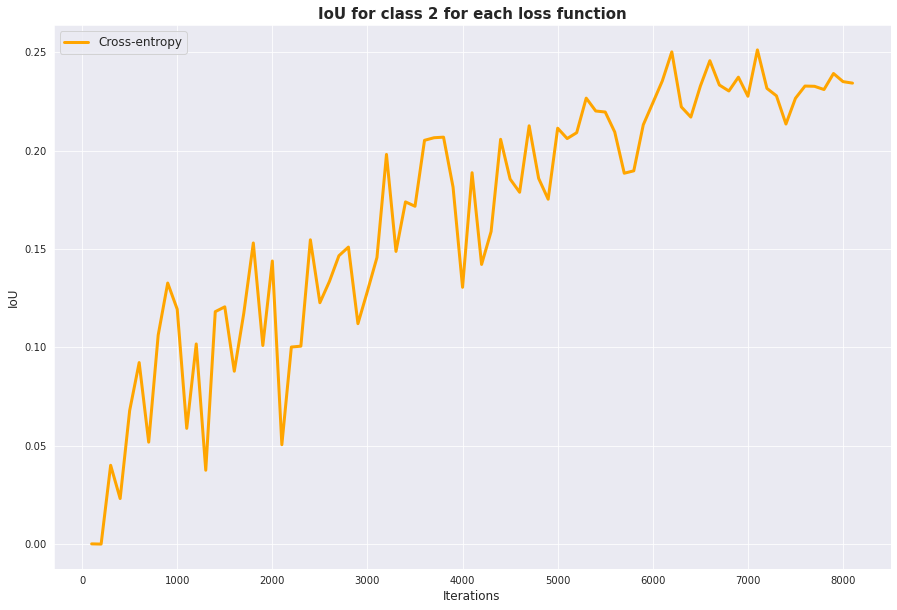

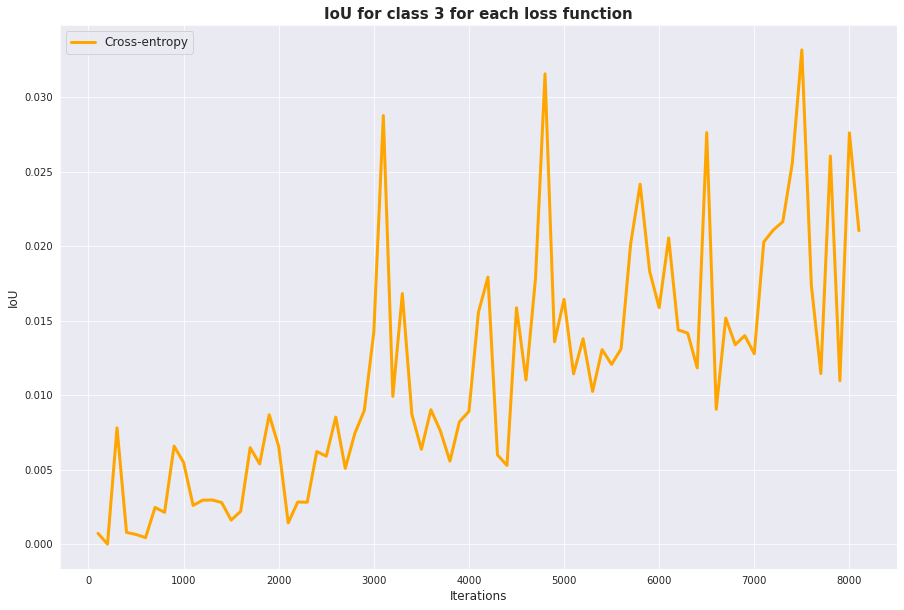

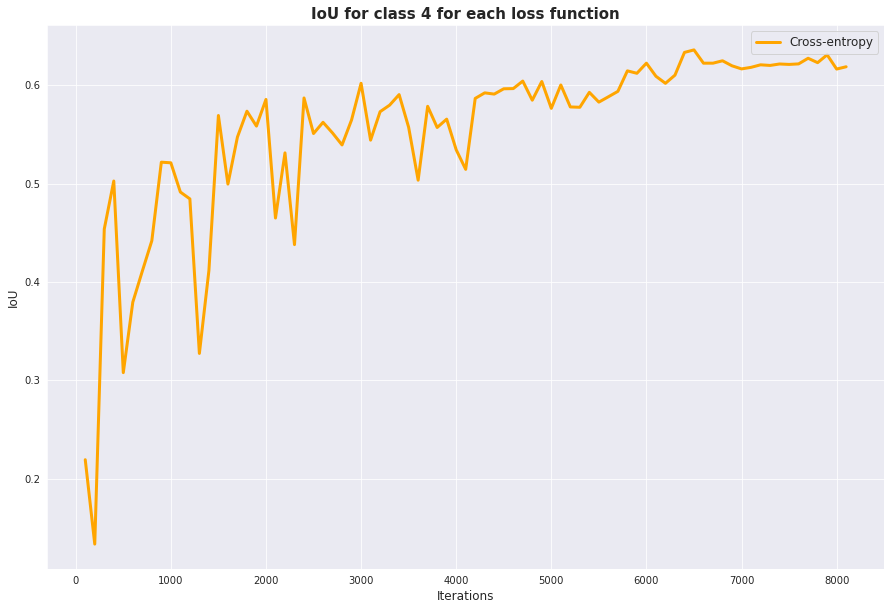

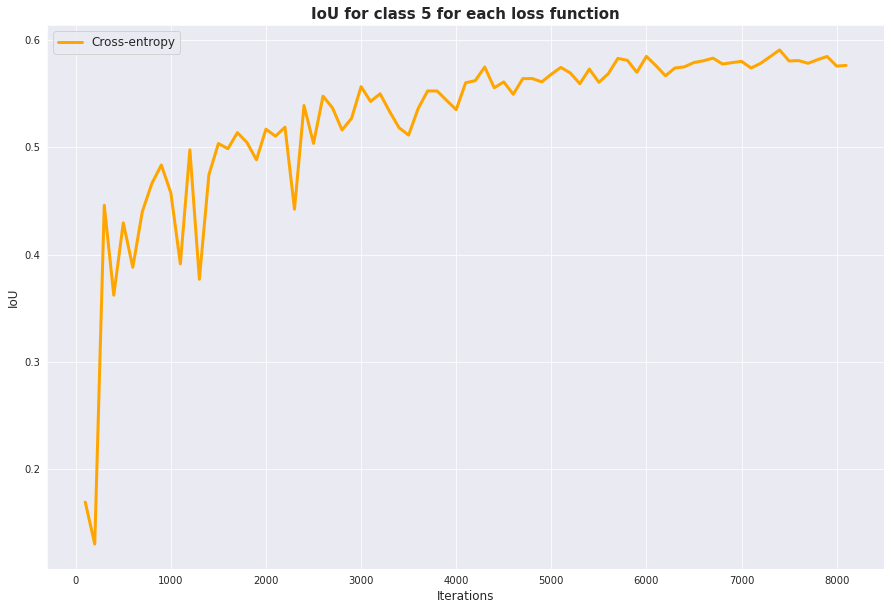

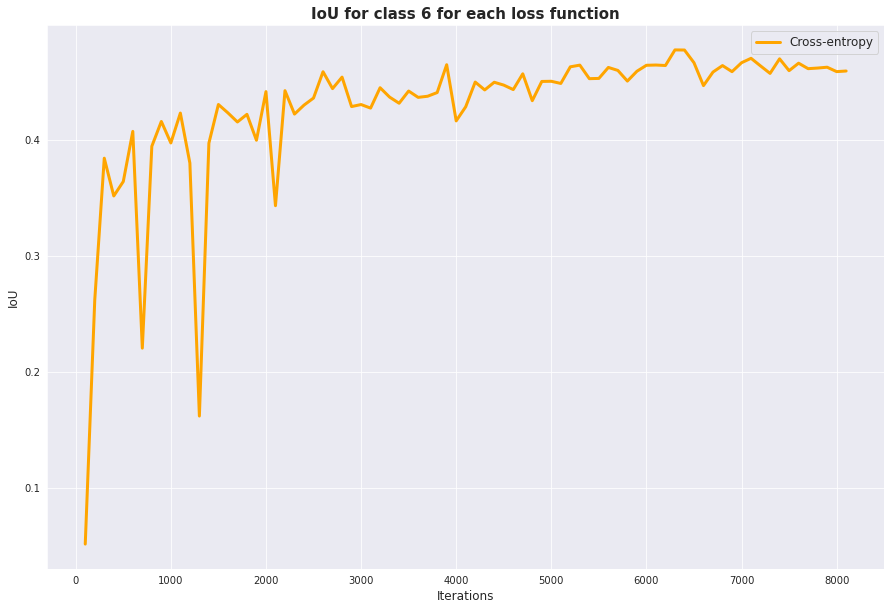

In [168]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(overs2_cross_df.Iterations,  overs2_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(overs2_focal_loss_df.Iterations,  overs2_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
#     plt.plot(overs2_acw_loss_df.Iterations,  overs2_acw_loss_df[f'Class {class_} IoU'], 
#              label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(overs2_lovasz_loss_df.Iterations, overs2_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-ovs2-class-{class_}.png')
    plt.show()

## 3.3 Oversampling 3

In [169]:
loss_fns = ['cross_entropy']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
overs3_dfs_eval = []
overs3_dfs_train = []
for loss_fn in loss_fns:
    overs3_results = f"./oversample_results/ovs3/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(overs3_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(overs3_results, 'os_32/train_results.csv'))
    overs3_dfs_eval.append(df)
    overs3_dfs_train.append(df_2)

### Cross entropy loss

In [151]:
overs3_cross_df = overs3_dfs_eval[0]
overs3_cross_df[overs3_cross_df['Mean IoUs'] == overs3_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
78       5        7900   0.447893      0.76004     0.419056     0.247093   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
78     0.014144     0.607581     0.618617      0.46872    0.606853   

    Overall Accs.  
78       0.800415

### Focal loss

In [152]:
# overs3_focal_loss_df = overs3_dfs_eval[1]
# overs3_focal_loss_df[overs3_focal_loss_df['Mean IoUs'] == overs3_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [153]:
# overs3_acw_loss_df = overs3_dfs_eval[2]
# overs3_acw_loss_df[overs3_acw_loss_df['Mean IoUs'] == overs3_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [154]:
# overs3_lovasz_df = overs3_dfs_eval[3]
# overs3_lovasz_df[overs3_lovasz_df['Mean IoUs'] == overs3_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [155]:
overs3_cross_e_train_df = overs3_dfs_train[0]
# overs3_focal_loss_train_df = overs3_dfs_train[1]
# overs3_acw_loss_train_df = overs3_dfs_train[2]
# overs3_lovasz_loss_train_df = overs3_dfs_train[3]

Text(0, 0.5, 'Loss')

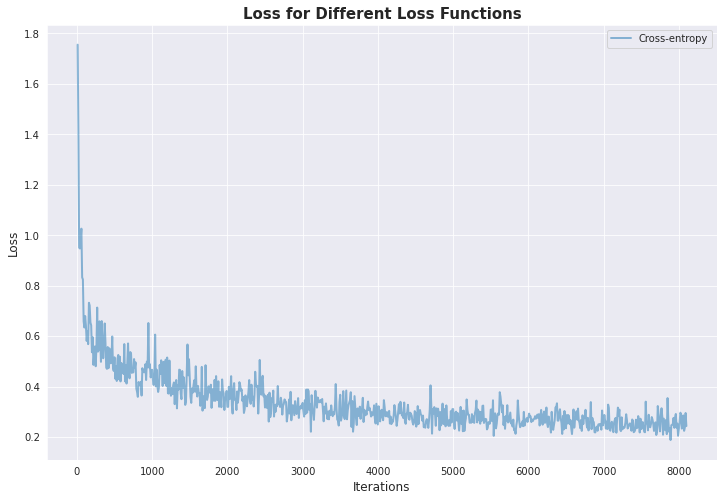

In [156]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(overs3_cross_e_train_df.Iterations, overs3_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(overs3_focal_loss_train_df.Iterations, overs3_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(overs3_acw_loss_train_df.Iterations, overs3_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
# plt.plot(overs3_lovasz_loss_train_df.Iterations, overs3_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

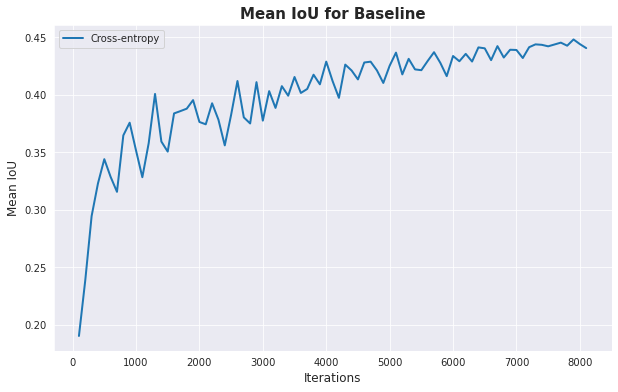

In [157]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(overs3_cross_df.Iterations, overs3_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(overs3_focal_loss_df.Iterations, overs3_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
# plt.plot(overs3_acw_loss_df.Iterations, overs3_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
# plt.plot(overs3_lovasz_loss_df.Iterations, overs3_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

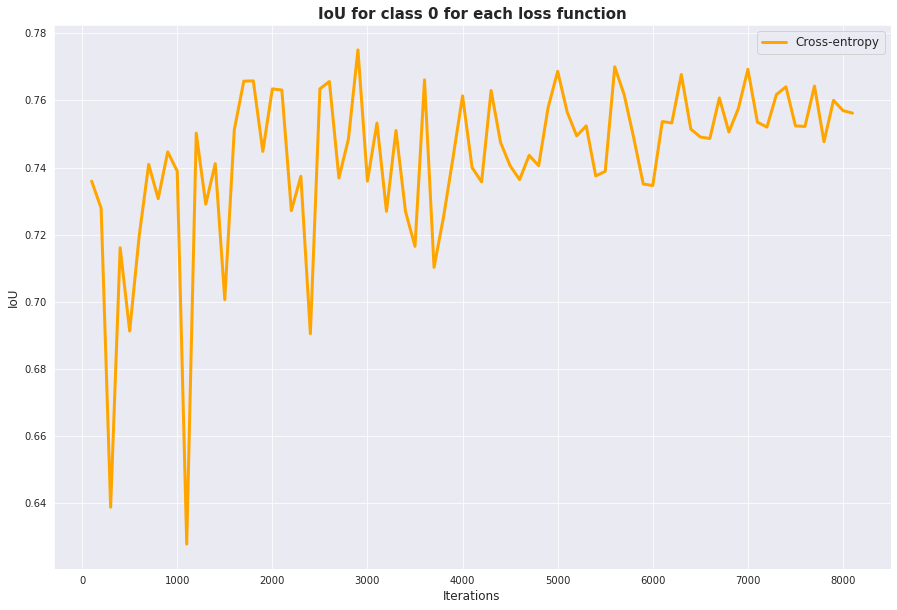

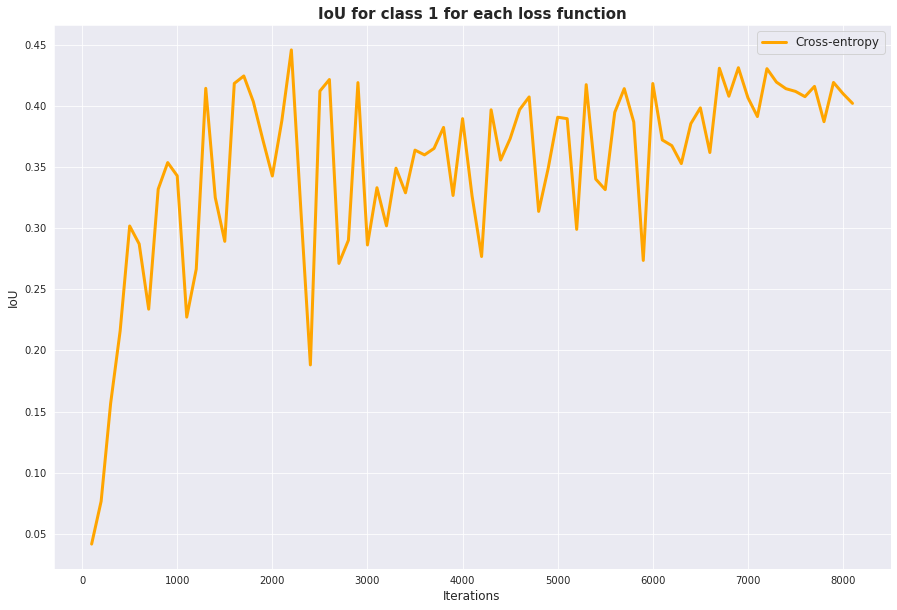

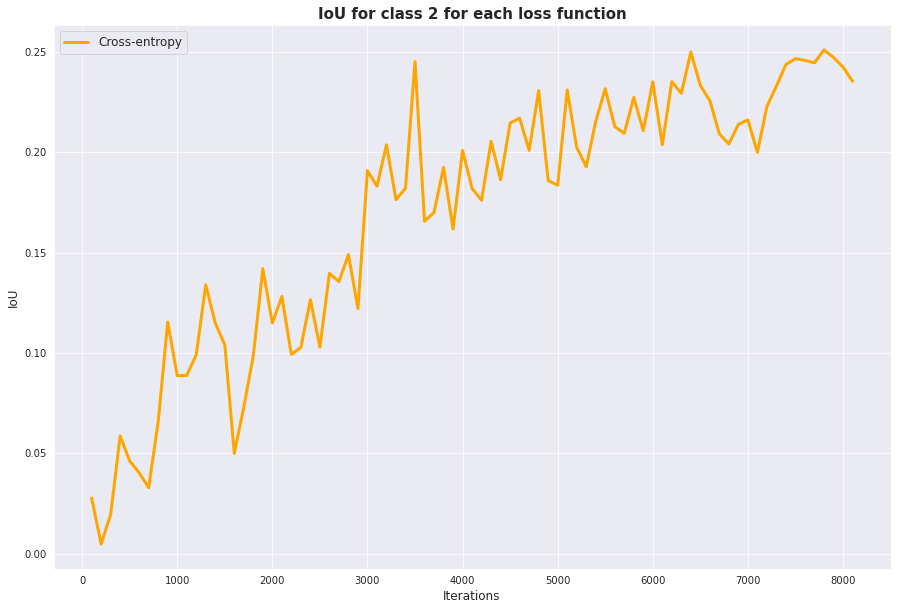

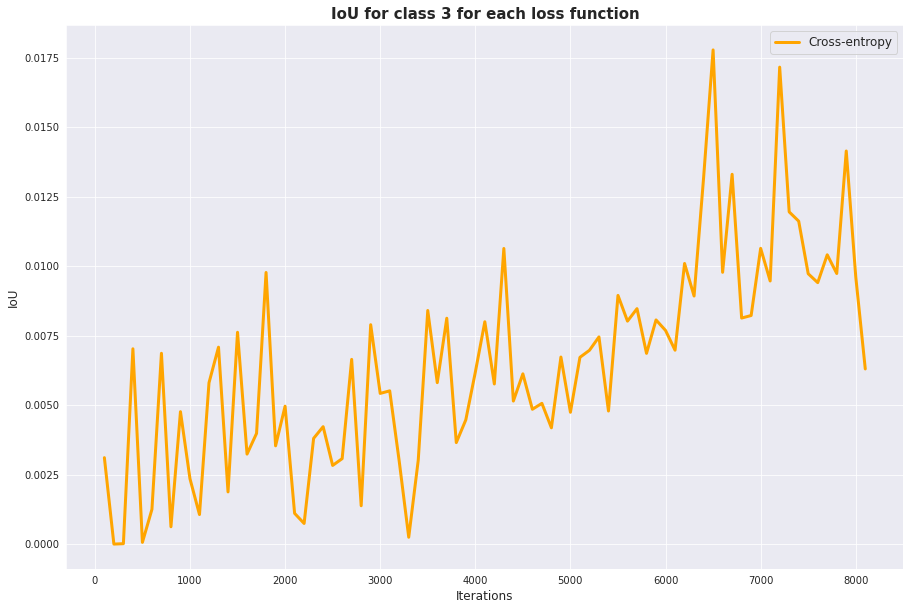

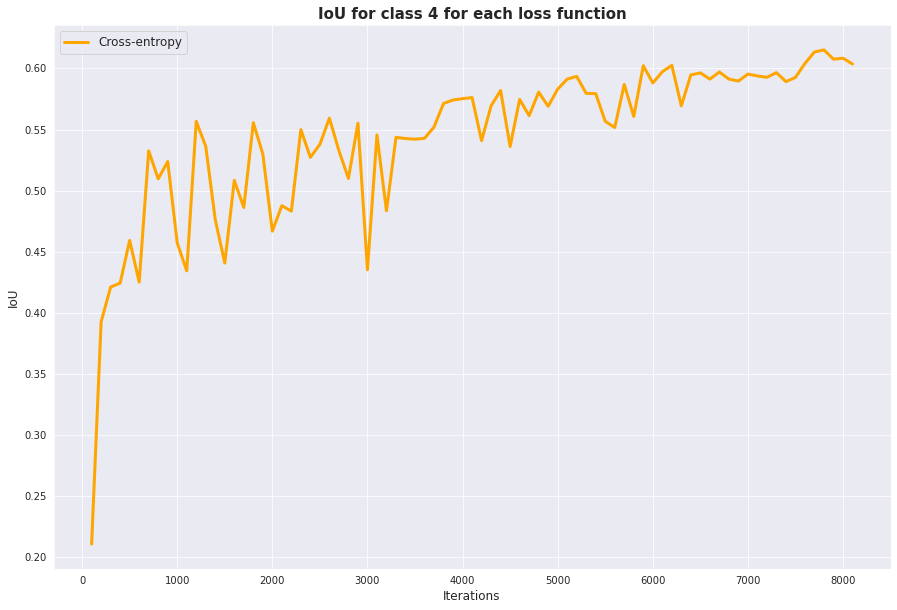

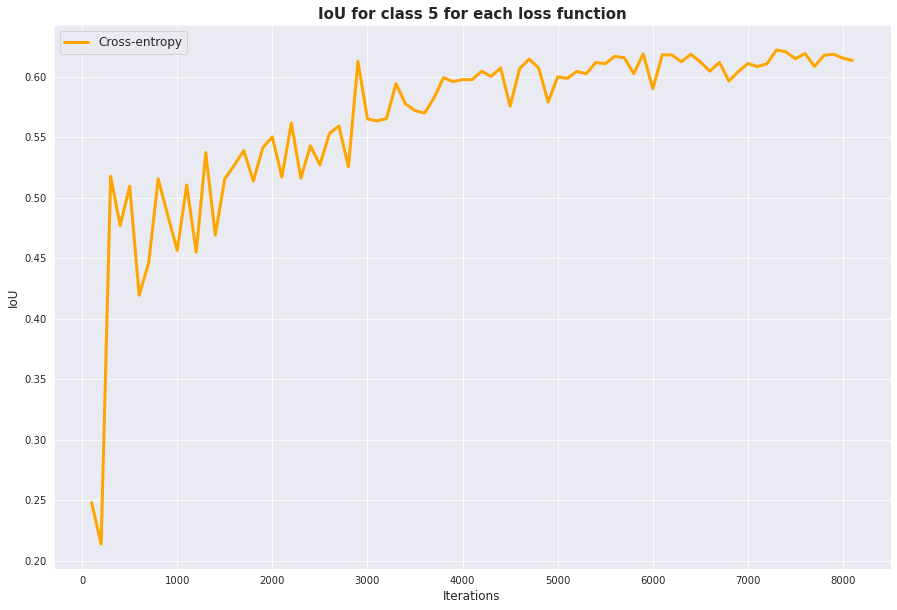

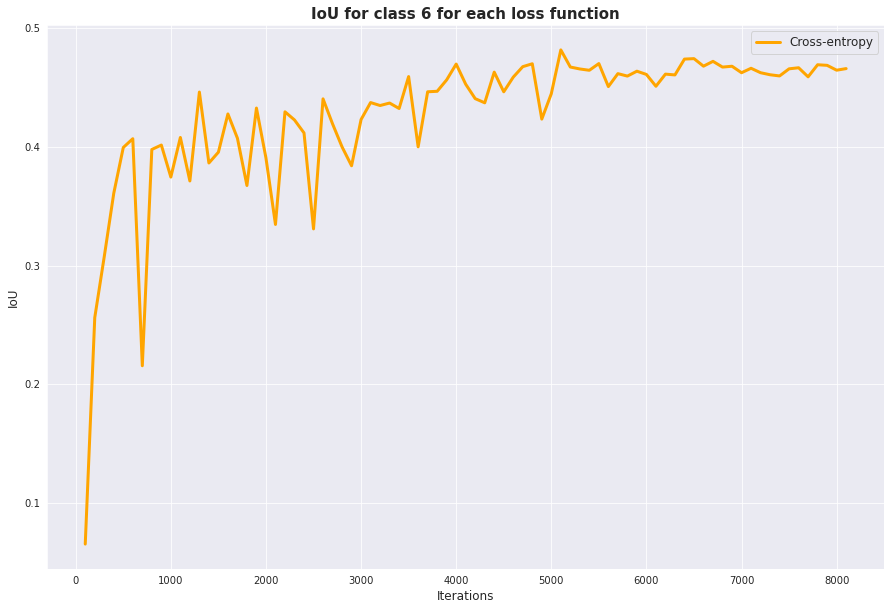

In [170]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(overs3_cross_df.Iterations,  overs3_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(overs3_focal_loss_df.Iterations,  overs3_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
#     plt.plot(overs3_acw_loss_df.Iterations,  overs3_acw_loss_df[f'Class {class_} IoU'], 
#              label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(overs3_lovasz_loss_df.Iterations, overs3_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-ovs3-class-{class_}.png')
    plt.show()

## 3.4 Oversampling 4

In [141]:
loss_fns = ['cross_entropy_ovs4']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
overs4_dfs_eval = []
overs4_dfs_train = []
for loss_fn in loss_fns:
    overs4_results = f"./oversample_results/ovs4/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(overs4_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(overs4_results, 'os_32/train_results.csv'))
    overs4_dfs_eval.append(df)
    overs4_dfs_train.append(df_2)

### Cross entropy loss

In [142]:
overs4_cross_df = overs4_dfs_eval[0]
overs4_cross_df[overs4_cross_df['Mean IoUs'] == overs4_cross_df['Mean IoUs'].max()]

Epochs  Iterations  Mean IoUs  Class 0 IoU  Class 1 IoU  Class 2 IoU  \
56       4        5700   0.449726     0.783347      0.46291     0.246687   

    Class 3 IoU  Class 4 IoU  Class 5 IoU  Class 6 IoU  Mean Accs.  \
56     0.005148     0.579519     0.609847     0.460622    0.585239   

    Overall Accs.  
56       0.815902

### Focal loss

In [143]:
# overs4_focal_loss_df = overs4_dfs_eval[1]
# overs4_focal_loss_df[overs4_focal_loss_df['Mean IoUs'] == overs4_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [144]:
# overs4_acw_loss_df = overs4_dfs_eval[2]
# overs4_acw_loss_df[overs4_acw_loss_df['Mean IoUs'] == overs4_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [145]:
# overs4_lovasz_df = overs4_dfs_eval[3]
# overs4_lovasz_df[overs4_lovasz_df['Mean IoUs'] == overs4_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [146]:
overs4_cross_e_train_df = overs4_dfs_train[0]
# overs4_focal_loss_train_df = overs4_dfs_train[1]
# overs4_acw_loss_train_df = overs4_dfs_train[2]
# overs4_lovasz_loss_train_df = overs4_dfs_train[3]

Text(0, 0.5, 'Loss')

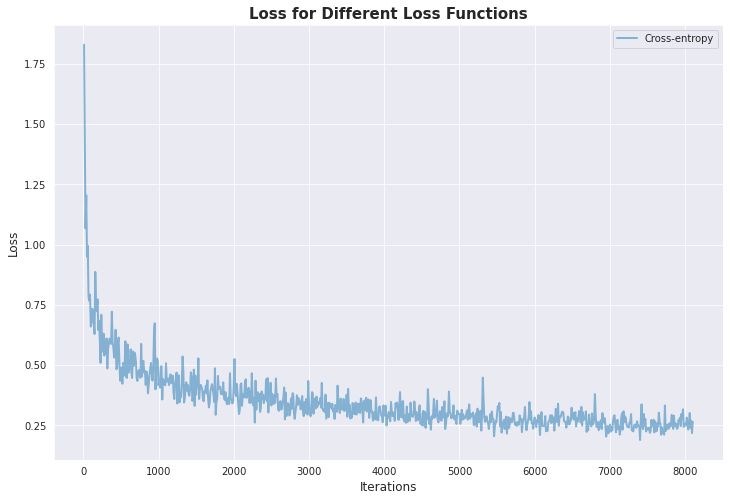

In [147]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(overs4_cross_e_train_df.Iterations, overs4_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(overs4_focal_loss_train_df.Iterations, overs4_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(overs4_acw_loss_train_df.Iterations, overs4_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
# plt.plot(overs4_lovasz_loss_train_df.Iterations, overs4_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

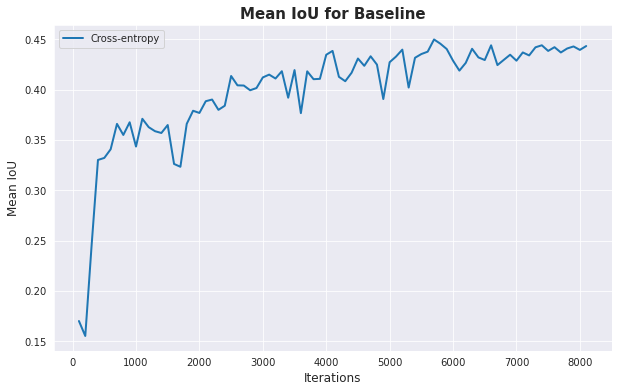

In [148]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(overs4_cross_df.Iterations, overs4_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(overs4_focal_loss_df.Iterations, overs4_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
# plt.plot(overs4_acw_loss_df.Iterations, overs4_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
# plt.plot(overs4_lovasz_loss_df.Iterations, overs4_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

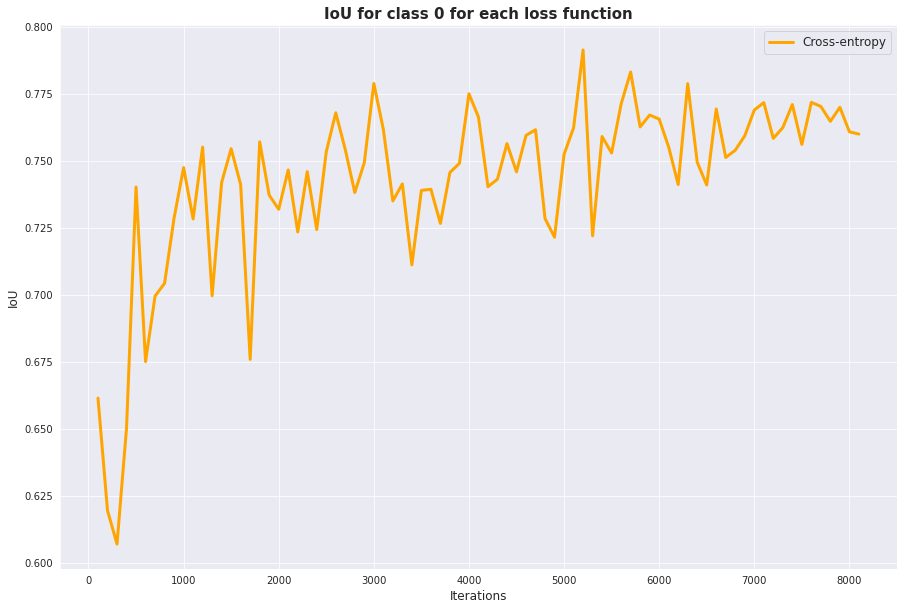

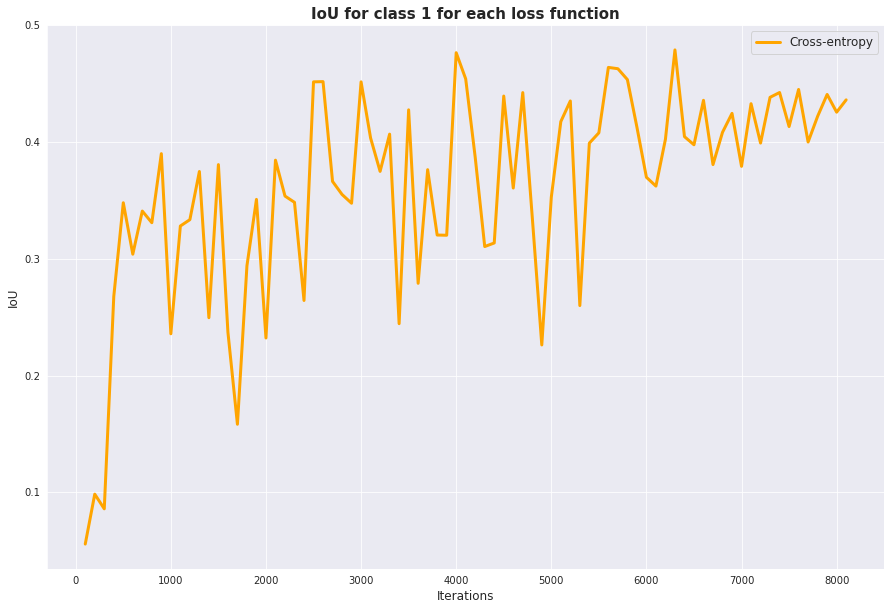

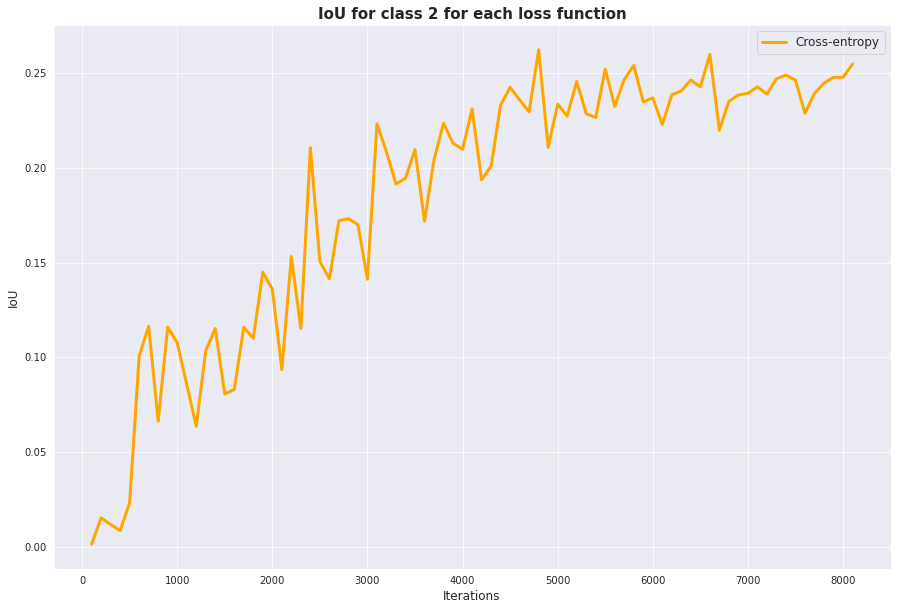

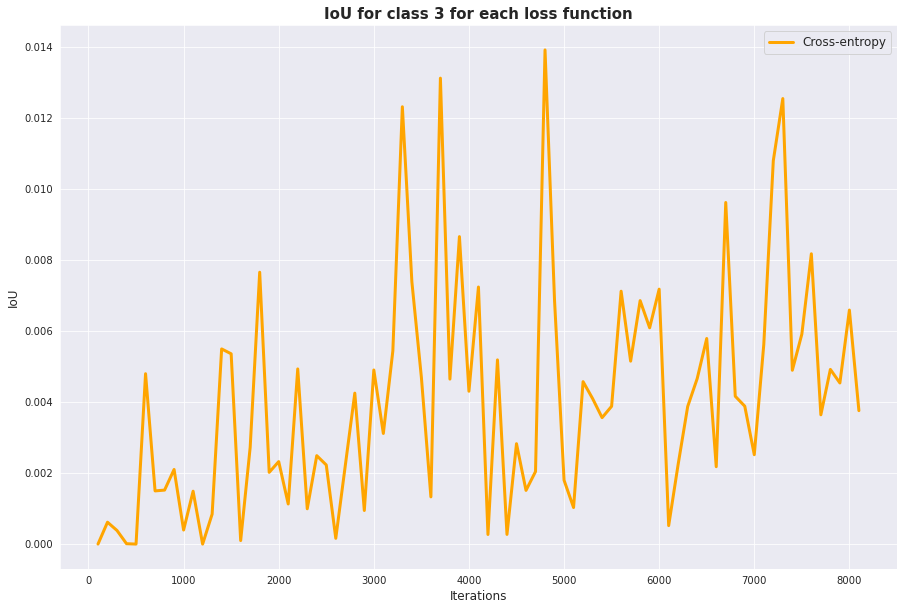

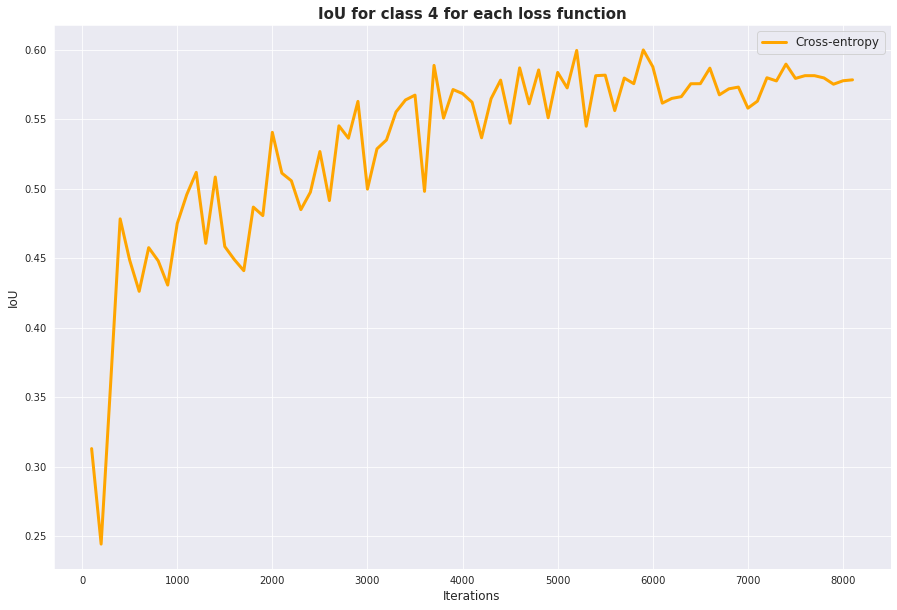

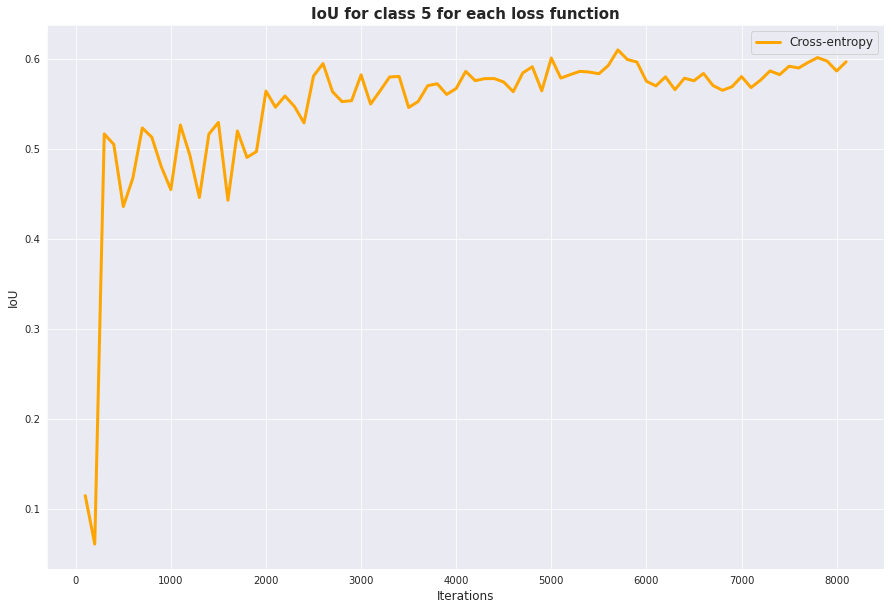

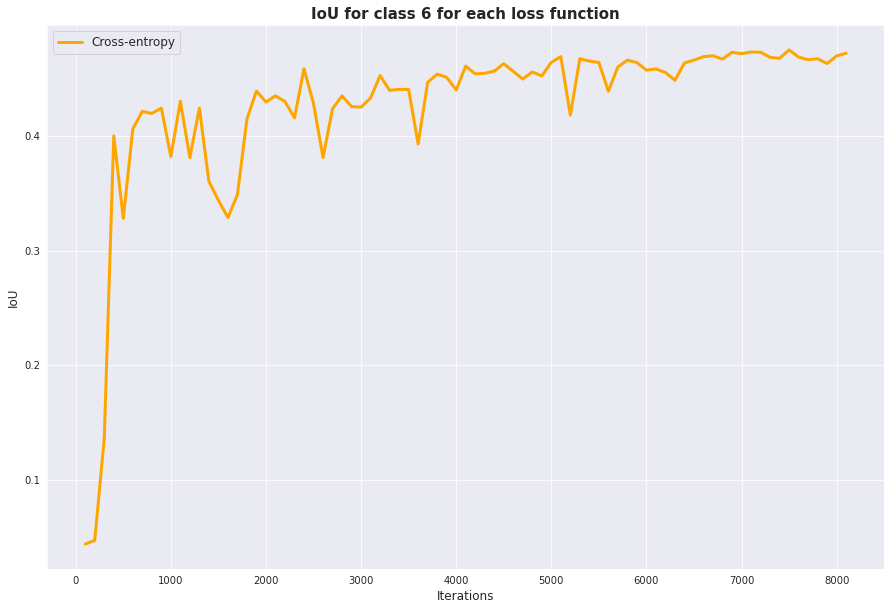

In [171]:
sns.set_style("darkgrid")
for class_ in range(0,7):
    fig, axs = plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(overs4_cross_df.Iterations, overs4_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(overs4_focal_loss_df.Iterations, overs4_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
#     plt.plot(overs4_acw_loss_df.Iterations, overs4_acw_loss_df[f'Class {class_} IoU'], 
#              label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(overs4_lovasz_loss_df.Iterations, overs4_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    fig.savefig(f'plots/loss-fns-os32-ovs4-class-{class_}.png')
    plt.show()